# Credit Risk Analysis: Loan Default Prediction

## 1. Introduction

This notebook presents a comprehensive analysis of loan default prediction using machine learning techniques. The goal is to identify key factors that influence loan defaults and build predictive models to assess default risk.



# 2. Data Understanding

## Data Source
The dataset used in this analysis is `Final_Loans_dataset.csv`, which contains loan-related information such as borrower demographics, credit scores, loan amounts, and repayment status. The data is sourced from a financial institution and includes both performing and non-performing loans.

## Business Problem
Financial institutions need to accurately predict loan defaults to:

- Minimize financial losses

- Optimize risk management strategies

- Improve lending decision processes

- Maintain healthy loan portfolios

## Dataset Overview
The dataset contains 115,893 loan records with 18 features including:

- Demographic information (age, gender, marital status)

- Financial information (credit score, net income, EMI)

- Loan characteristics (principal amount, product type)

- Target variable: Default status


## Data Preprocessing and Exploratory Data Analysis
This notebook presents a comprehensive analysis of loan data to predict default risk. The analysis includes data cleaning, preprocessing, exploratory data analysis, and visualization to understand the factors that influence loan defaults.

# Import Libraries

In [1]:
#Import libraries
#import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# For model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
# sns.set_palette("Set2")

# Display settings for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## Data Loading and Initial Exploration
We begin by loading the dataset and examining its structure to understand what we're working with.

## Load the dataset

In [2]:
#  reload the CSV with the low_memory=False parameter to properly handle the mixed data types:
df = pd.read_csv('../Data/Final_dataset_Final.csv', low_memory=False)
print(f"Dataset dimensions: {df.shape}")

Dataset dimensions: (115893, 18)


**Initial Dataset Dimensions:** 115,893 records with 18 features


## Basic Dataset Information

In [3]:
# Check basic information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115893 entries, 0 to 115892
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         115893 non-null  int64  
 1   GENDER                     100117 non-null  object 
 2   AGE                        98437 non-null   float64
 3   MARITAL_STATUS             70425 non-null   object 
 4   EMPLOYMENT_STATUS          84133 non-null   object 
 5   CREDIT_SCORE               94881 non-null   float64
 6   SCORE_GRADE                94571 non-null   object 
 7   NO_DEFAULT_LOAN            94571 non-null   float64
 8   RISK_GRADE                 115893 non-null  object 
 9   PRODUCT                    115892 non-null  object 
 10  CURRENCY                   115893 non-null  object 
 11  NET INCOME                 115893 non-null  float64
 12  PRINCIPAL_DISBURSED        115893 non-null  object 
 13  EMI                        11

 **Key Observations:**
 - The dataset contains a mix of numeric and categorical variables
 - Several columns have missing values that need addressing
 - Important features include demographic information (gender, age, marital status), financial indicators (credit score, income), and loan details

In [4]:
# Check the first few rows with more readable output
print(df.head().to_string())

       ID GENDER   AGE MARITAL_STATUS EMPLOYMENT_STATUS  CREDIT_SCORE SCORE_GRADE  NO_DEFAULT_LOAN RISK_GRADE                     PRODUCT CURRENCY  NET INCOME PRINCIPAL_DISBURSED        EMI  OD_DAYS PRUDENTIAL_CLASSIFICATION   OD_AMOUNT LOAN_STATUS
0  104465   MALE   NaN            NaN               NaN         480.0          JJ              1.0        B20  Premium Finance - Consumer      KES         0.0          235,203.00  40,637.03     2995                      LOSS   45,011.10     EXPIRED
1  138046   MALE  55.0            NaN               NaN         537.0          JJ              2.0        B20     Consumer Unsecured Loan      KES         0.0          215,000.00   7,186.79     2582                      LOSS  115,674.06     EXPIRED
2  173501   MALE   NaN            NaN               NaN         545.0          JJ              1.0        B20     Consumer Unsecured Loan      KES         0.0          155,000.00   4,258.42     2667                      LOSS   65,541.89     EXPIRED
3  1

Examining the first few rows reveals the structure of our data, including loan IDs, customer demographics, financial metrics, and loan status information.

In [5]:
# Check the last few rows with more readable output
print(df.tail().to_string())

            ID  GENDER   AGE MARITAL_STATUS EMPLOYMENT_STATUS  CREDIT_SCORE SCORE_GRADE  NO_DEFAULT_LOAN RISK_GRADE                PRODUCT CURRENCY  NET INCOME PRINCIPAL_DISBURSED        EMI  OD_DAYS PRUDENTIAL_CLASSIFICATION OD_AMOUNT LOAN_STATUS
115888  154303    MALE  38.0        MARRIED     SELF-EMPLOYED         624.0          HH              4.0         A5  Digital Personal Loan      KES  3090724.25          100,000.00  34,398.05        0                    NORMAL         0     CURRENT
115889   61445    MALE  43.0        MARRIED          EMPLOYED         579.0          JJ              1.0         A5            Mobile Loan      KES   819280.00           20,746.00  21,088.53        0                    NORMAL         0     CURRENT
115890  151235    MALE  27.0         SINGLE          EMPLOYED         636.0          HH              0.0         A5            Mobile Loan      KES   529145.61           12,700.00  12,909.69        0                    NORMAL         0     CURRENT
115891  

In [6]:
# Get descriptive statistics
df.describe(include='all')

,ID,GENDER,AGE,MARITAL_STATUS,EMPLOYMENT_STATUS,CREDIT_SCORE,SCORE_GRADE,NO_DEFAULT_LOAN,RISK_GRADE,PRODUCT,CURRENCY,NET INCOME,PRINCIPAL_DISBURSED,EMI,OD_DAYS,PRUDENTIAL_CLASSIFICATION,OD_AMOUNT,LOAN_STATUS
count,115893.000000,100117,98437.000000,70425,84133,94881.000000,94571,94571.000000,115893,115892,115893,1.158930e+05,115893,115893,115893.000000,115893,115893,115893
unique,NaN,2,NaN,7,6,NaN,13,NaN,11,100,4,NaN,43552,83203,NaN,5,40474,3
top,NaN,MALE,NaN,MARRIED,EMPLOYED,NaN,JJ,NaN,A5,Mobile Loan,KES,NaN,"70,000.00","71,155.75",NaN,NORMAL,0,CURRENT
freq,NaN,71290,NaN,43927,47491,NaN,17804,NaN,84122,45289,114941,NaN,5192,2311,NaN,88645,74953,87592
mean,125044.802154,NaN,39.544368,NaN,NaN,651.381130,NaN,1.390775,NaN,NaN,NaN,1.443014e+06,NaN,NaN,236.655398,NaN,NaN,NaN
std,43349.212378,NaN,13.383122,NaN,NaN,80.207887,NaN,1.958711,NaN,NaN,NaN,4.520676e+06,NaN,NaN,664.039323,NaN,NaN,NaN
min,50001.000000,NaN,-1799.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,NaN,NaN,0.000000,NaN,NaN,NaN
25%,87557.000000,NaN,33.000000,NaN,NaN,597.000000,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,NaN,NaN,0.000000,NaN,NaN,NaN
50%,124829.000000,NaN,38.000000,NaN,NaN,647.000000,NaN,1.000000,NaN,NaN,NaN,2.055950e+05,NaN,NaN,0.000000,NaN,NaN,NaN
75%,162685.000000,NaN,45.000000,NaN,NaN,710.000000,NaN,2.000000,NaN,NaN,NaN,1.173422e+06,NaN,NaN,21.000000,NaN,NaN,NaN


The descriptive statistics highlight several important characteristics:
- Credit scores range from 0 to 830 with a mean of approximately 651
- Age ranges from very young to elderly (with some likely data entry errors)
- There's a wide range of loan amounts and income levels
- About 19% of loans are in default

## Data Cleaning and Preprocessing



Before analysis, we need to address data quality issues including missing values, data type conversions, and standardization.

### Missing Value Analysis

In [7]:
# Count missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
ID                               0
GENDER                       15776
AGE                          17456
MARITAL_STATUS               45468
EMPLOYMENT_STATUS            31760
CREDIT_SCORE                 21012
SCORE_GRADE                  21322
NO_DEFAULT_LOAN              21322
RISK_GRADE                       0
PRODUCT                          1
CURRENCY                         0
NET INCOME                       0
PRINCIPAL_DISBURSED              0
EMI                              0
OD_DAYS                          0
PRUDENTIAL_CLASSIFICATION        0
OD_AMOUNT                        0
LOAN_STATUS                      0
dtype: int64


In [8]:
# calculate percentage of missing values
missing_percentage = (missing_values / len(df)) * 100
print("\nPercentage of missing values per column:")
print(missing_percentage)


Percentage of missing values per column:
ID                            0.000000
GENDER                       13.612556
AGE                          15.062169
MARITAL_STATUS               39.232741
EMPLOYMENT_STATUS            27.404589
CREDIT_SCORE                 18.130517
SCORE_GRADE                  18.398005
NO_DEFAULT_LOAN              18.398005
RISK_GRADE                    0.000000
PRODUCT                       0.000863
CURRENCY                      0.000000
NET INCOME                    0.000000
PRINCIPAL_DISBURSED           0.000000
EMI                           0.000000
OD_DAYS                       0.000000
PRUDENTIAL_CLASSIFICATION     0.000000
OD_AMOUNT                     0.000000
LOAN_STATUS                   0.000000
dtype: float64


> **Missing Value Summary:**
> - MARITAL_STATUS has the highest proportion of missing values (39.2%)
> - EMPLOYMENT_STATUS is missing for 27.4% of records
> - AGE, CREDIT_SCORE, and SCORE_GRADE also have significant missing data (15-18%)
> - Several critical columns have no missing values, which is positive

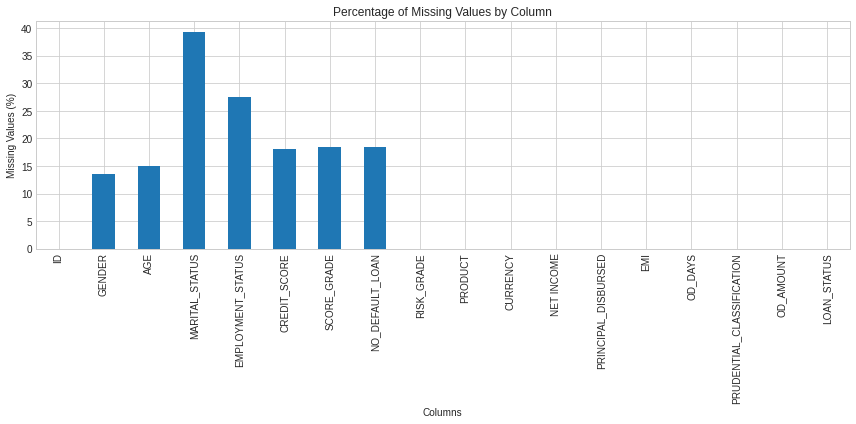

In [9]:
# Plot missing values 
plt.figure(figsize=(12, 6))
missing_percentage.plot(kind='bar')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Missing Values (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The missing value visualization clearly shows which features require our attention during the cleaning process.

## Data Cleaning Steps

### Numeric Column Cleaning

In [10]:
# Clean Numeric Columns
# Remove commas and convert to float
# Columns with comma-separated numeric values
numeric_columns = ['EMI', 'OD_AMOUNT', 'PRINCIPAL_DISBURSED']

for col in numeric_columns:
    # Convert to string first to handle any non-string values
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)


Numeric columns were standardized by removing commas and converting to appropriate numeric types.

#### Age Column Cleaning

# Convert to numeric and handle unrealistic values

In [11]:
# Clean Age Column
# Convert to numeric and handle unrealistic values
df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')

# Remove unrealistic age values (less than 18 or greater than 100)
df.loc[(df['AGE'] < 18) | (df['AGE'] > 100), 'AGE'] = np.nan

Age data was cleaned by:
- Converting to numeric format
- Identifying and removing unrealistic values (ages below 18 or above 100)



#### Handling Missing Values

In [12]:
# Handle Missing Values
# Drop rows with missing critical information
# These columns are crucial for meaningful analysis
critical_columns = ['CREDIT_SCORE', 'SCORE_GRADE', 'GENDER', 'AGE', 'EMPLOYMENT_STATUS']
df.dropna(subset=critical_columns, inplace=True)

In [13]:
# Fill missing Marital Status
df['MARITAL_STATUS'] = df['MARITAL_STATUS'].fillna('OTHER')

Our missing value strategy:
- Remove records missing critical financial or demographic information
- For less critical information like marital status, fill with a neutral "OTHER" category


### Standardizing Categorical Columns

In [14]:
# Standardize Categorical Columns
# Convert to uppercase for consistency
categorical_columns = ['GENDER', 'MARITAL_STATUS', 'EMPLOYMENT_STATUS', 'PRODUCT']
for col in categorical_columns:
    df[col] = df[col].str.upper()

Categorical columns were standardized to ensure consistent analysis

## Feature Engineering

### Creating Default Status Feature 

In [15]:
# Create Default Status Feature
# Classify loans based on Prudential Classification
df['DEFAULT_STATUS'] = np.where(
    df['PRUDENTIAL_CLASSIFICATION'].isin(['SUBSTANDARD', 'DOUBTFUL', 'LOSS']), 
    'DEFAULT', 
    'NON-DEFAULT'
)

We created a binary target variable for our prediction model:
- DEFAULT: Loans classified as SUBSTANDARD, DOUBTFUL, or LOSS
- NON-DEFAULT: Normal performing loans

### Data Validation

In [16]:
# Data Validation and Exploration
# Print cleaned dataset dimensions
print("\nCleaned Dataset Dimensions:", df.shape)


Cleaned Dataset Dimensions: (79247, 19)


> **Cleaned Dataset Dimensions:** 79,247 records with 20 features

After cleaning, we retained about 68% of the original records while adding two new engineered features.

## Exploratory Data Analysis (EDA)



### Default Status Distribution

In [17]:
# Distribution of Default Status
print("\nDefault Status Distribution:")
print(df['DEFAULT_STATUS'].value_counts(normalize=True) * 100)


Default Status Distribution:
NON-DEFAULT    80.743751
DEFAULT        19.256249
Name: DEFAULT_STATUS, dtype: float64



Default Status Distribution:
NON-DEFAULT    80.743751
DEFAULT        19.256249
Name: DEFAULT_STATUS, dtype: float64


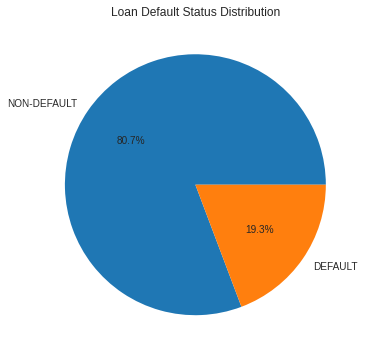

In [18]:
# Distribution of Default Status
print("\nDefault Status Distribution:")
print(df['DEFAULT_STATUS'].value_counts(normalize=True) * 100)

# Visualize Default Status
plt.figure(figsize=(8, 6))
df['DEFAULT_STATUS'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Loan Default Status Distribution')
plt.ylabel('')
plt.show()

> **Class Distribution:**
> - Non-Default loans: 80.7%
> - Default loans: 19.3%

The class distribution shows an imbalance, with defaults representing about 19% of the dataset. This imbalance will need to be addressed during modeling.

### Demographic Analysis

In [19]:
# Marital Status Distribution
print("\nMarital Status Distribution:")
print(df['MARITAL_STATUS'].value_counts())


Marital Status Distribution:
MARRIED     40816
SINGLE      22463
OTHER       15578
WIDOWED       163
DIVORCED       99
ENGAGED        99
PARTNER        29
Name: MARITAL_STATUS, dtype: int64


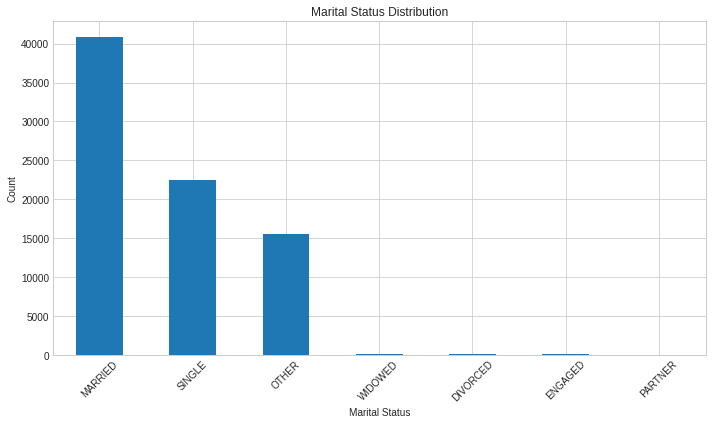

In [20]:
plt.figure(figsize=(10, 6))
df['MARITAL_STATUS'].value_counts().plot(kind='bar')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
# Feature Engineering
# Create Age Groups
def categorize_age(age):
    if pd.isna(age):
        return 'UNKNOWN'
    elif age < 26:
        return '18-25'
    elif age < 36:
        return '26-35'
    elif age < 46:
        return '36-45'
    elif age < 56:
        return '46-55'
    else:
        return '56+'

df['AGE_GROUP'] = df['AGE'].apply(categorize_age)

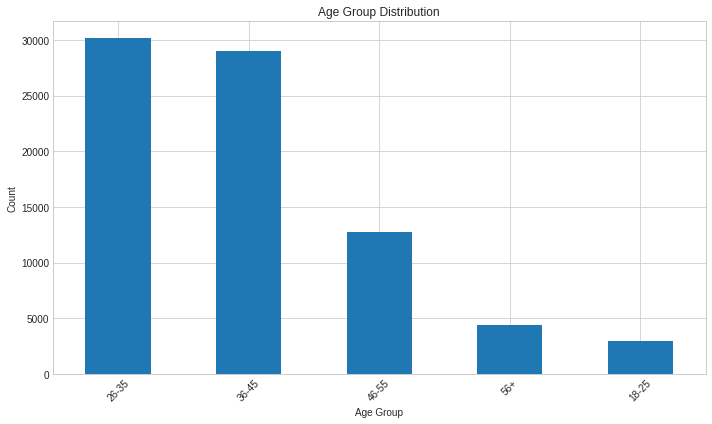

In [22]:
# Visualize Age Groups
plt.figure(figsize=(10, 6))
df['AGE_GROUP'].value_counts().plot(kind='bar')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> **Demographic Insights:**
> - Most borrowers are married (51.5%)
> - 26-35 and 36-45 age groups represent the largest portions of borrowers (74.6% combined)
> - Very young (18-25) and older (56+) borrowers are less common

In [23]:
# Final Inspection
print("\nCleaned Dataset Information:")
print(df.info())
print(df.shape)


Cleaned Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 79247 entries, 4 to 115892
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         79247 non-null  int64  
 1   GENDER                     79247 non-null  object 
 2   AGE                        79247 non-null  float64
 3   MARITAL_STATUS             79247 non-null  object 
 4   EMPLOYMENT_STATUS          79247 non-null  object 
 5   CREDIT_SCORE               79247 non-null  float64
 6   SCORE_GRADE                79247 non-null  object 
 7   NO_DEFAULT_LOAN            79247 non-null  float64
 8   RISK_GRADE                 79247 non-null  object 
 9   PRODUCT                    79247 non-null  object 
 10  CURRENCY                   79247 non-null  object 
 11  NET INCOME                 79247 non-null  float64
 12  PRINCIPAL_DISBURSED        79247 non-null  float64
 13  EMI            

### Univariate Analysis of Numeric Variables

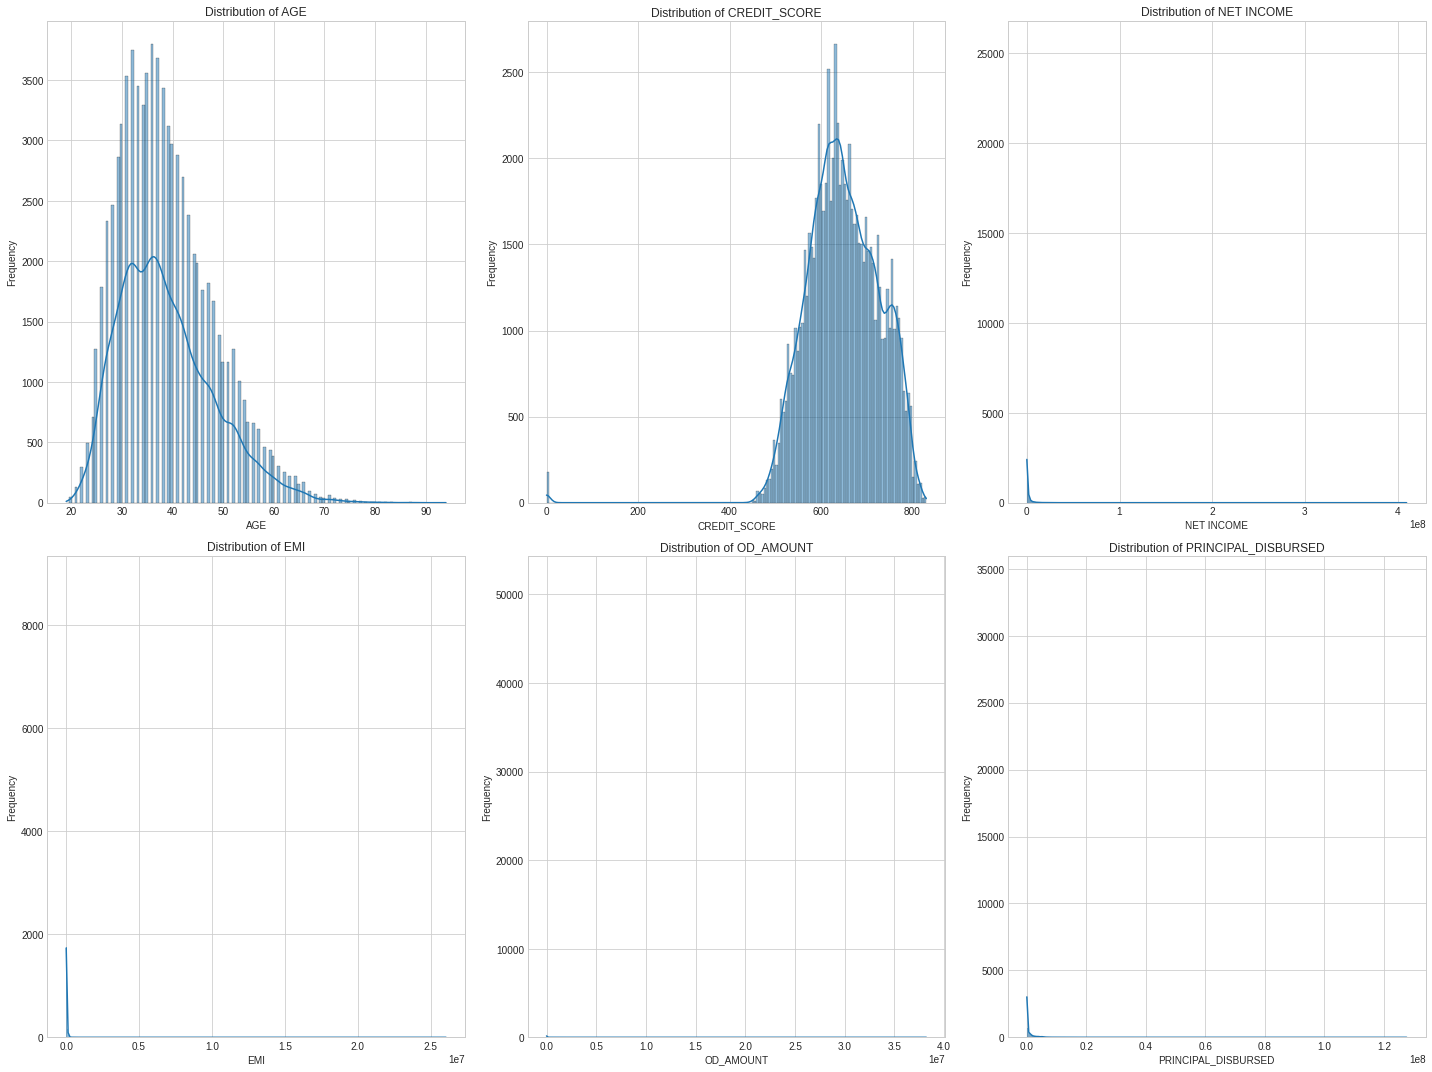

Descriptive Statistics for Numeric Columns:
                AGE  CREDIT_SCORE    NET INCOME           EMI     OD_AMOUNT  PRINCIPAL_DISBURSED
count  79247.000000  79247.000000  7.924700e+04  7.924700e+04  7.924700e+04         7.924700e+04
mean      38.661602    648.151854  1.625917e+06  3.348906e+04  8.124423e+04         7.368802e+05
std        9.292102     80.524472  4.676259e+06  1.555518e+05  4.860589e+05         1.901455e+06
min       19.000000      0.000000  0.000000e+00  0.000000e+00  0.000000e+00         0.000000e+00
25%       32.000000    595.000000  0.000000e+00  5.576825e+03  0.000000e+00         8.000000e+03
50%       37.000000    645.000000  4.050300e+05  1.695569e+04  0.000000e+00         5.300000e+04
75%       44.000000    706.000000  1.433164e+06  4.275022e+04  5.871670e+03         6.244086e+05
max       94.000000    830.000000  4.096672e+08  2.603850e+07  3.819982e+07         1.276698e+08


In [24]:
# Section 1: Numeric Variables Exploration
plt.figure(figsize=(20, 15))

# Numeric columns for distribution analysis
numeric_columns = ['AGE', 'CREDIT_SCORE', 'NET INCOME', 'EMI', 'OD_AMOUNT', 'PRINCIPAL_DISBURSED']

# Create subplot grid for distributions
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    
    # Histogram with KDE
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Descriptive statistics for numeric columns
print("Descriptive Statistics for Numeric Columns:")
print(df[numeric_columns].describe())

> **Key Numeric Variable Statistics:**
> - Average age is 38.7 years
> - Average credit score is 648.2 (mid-range)
> - Net income and loan amounts show high variability, indicating diverse financial profiles
> - The average EMI (Equated Monthly Installment) is 33,489, but with significant variation



### Categorical Variables Distribution

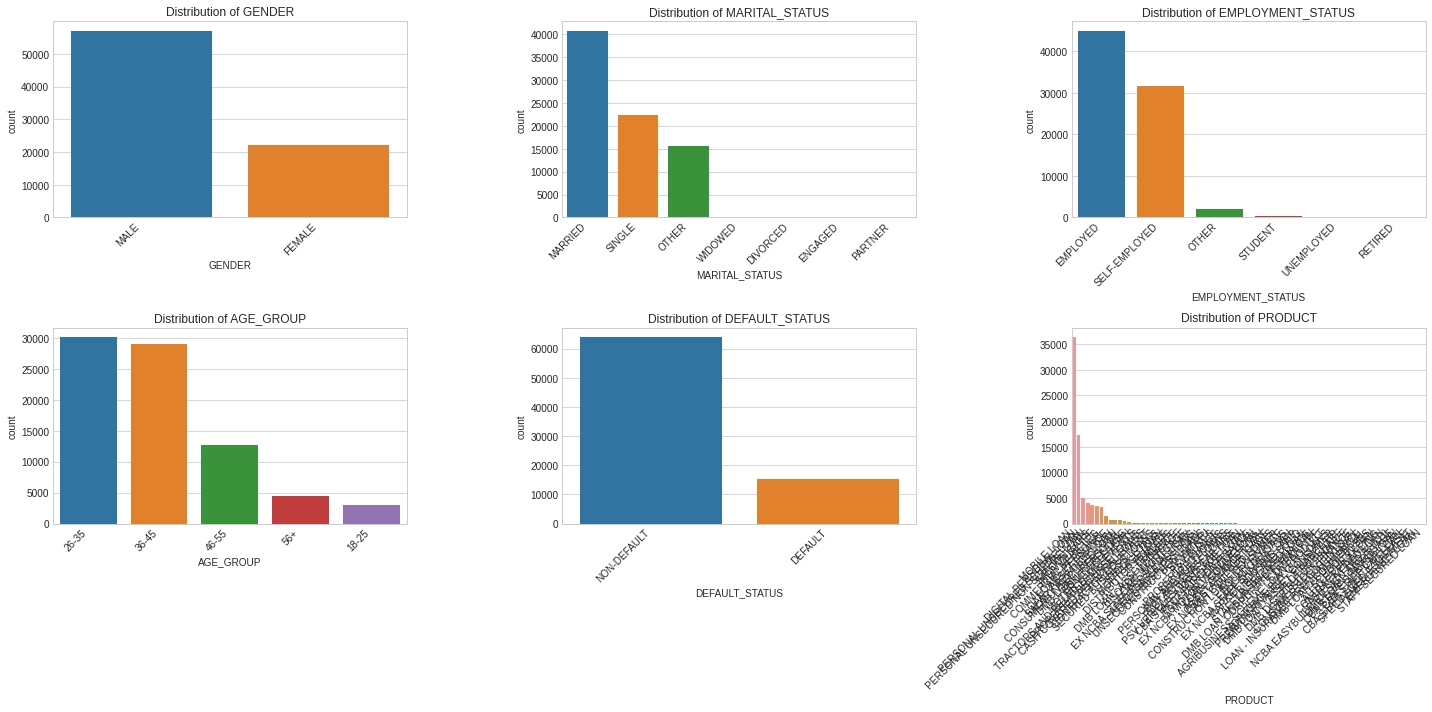


GENDER Distribution:
MALE      72.077176
FEMALE    27.922824
Name: GENDER, dtype: float64

MARITAL_STATUS Distribution:
MARRIED     51.504789
SINGLE      28.345553
OTHER       19.657526
WIDOWED      0.205686
DIVORCED     0.124926
ENGAGED      0.124926
PARTNER      0.036594
Name: MARITAL_STATUS, dtype: float64

EMPLOYMENT_STATUS Distribution:
EMPLOYED         56.704986
SELF-EMPLOYED    40.044418
OTHER             2.667609
STUDENT           0.446705
UNEMPLOYED        0.068141
RETIRED           0.068141
Name: EMPLOYMENT_STATUS, dtype: float64

AGE_GROUP Distribution:
26-35    38.049390
36-45    36.593183
46-55    16.095247
56+       5.529547
18-25     3.732633
Name: AGE_GROUP, dtype: float64

DEFAULT_STATUS Distribution:
NON-DEFAULT    80.743751
DEFAULT        19.256249
Name: DEFAULT_STATUS, dtype: float64

PRODUCT Distribution:
MOBILE LOAN                           45.975242
DIGITAL PERSONAL LOAN                 21.740886
PERSONAL UNSECURED SCHEME LOAN         6.248817
PERSONAL UNSECURE

In [25]:
# Section 2: Categorical Variables Exploration
categorical_columns = ['GENDER', 'MARITAL_STATUS', 'EMPLOYMENT_STATUS', 'AGE_GROUP', 'DEFAULT_STATUS', 'PRODUCT']

plt.figure(figsize=(20, 10))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    
    # Count plot for categorical variables
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.show()

# Categorical variable frequencies
for col in categorical_columns:
    print(f"\n{col} Distribution:")
    print(df[col].value_counts(normalize=True) * 100)

> **Key Categorical Distributions:**
> - Gender: 72% male, 28% female
> - Employment: 57% employed, 40% self-employed
> - Products: Mobile loans (46%) and digital personal loans (22%) are most common

### 4.5 Bivariate Analysis

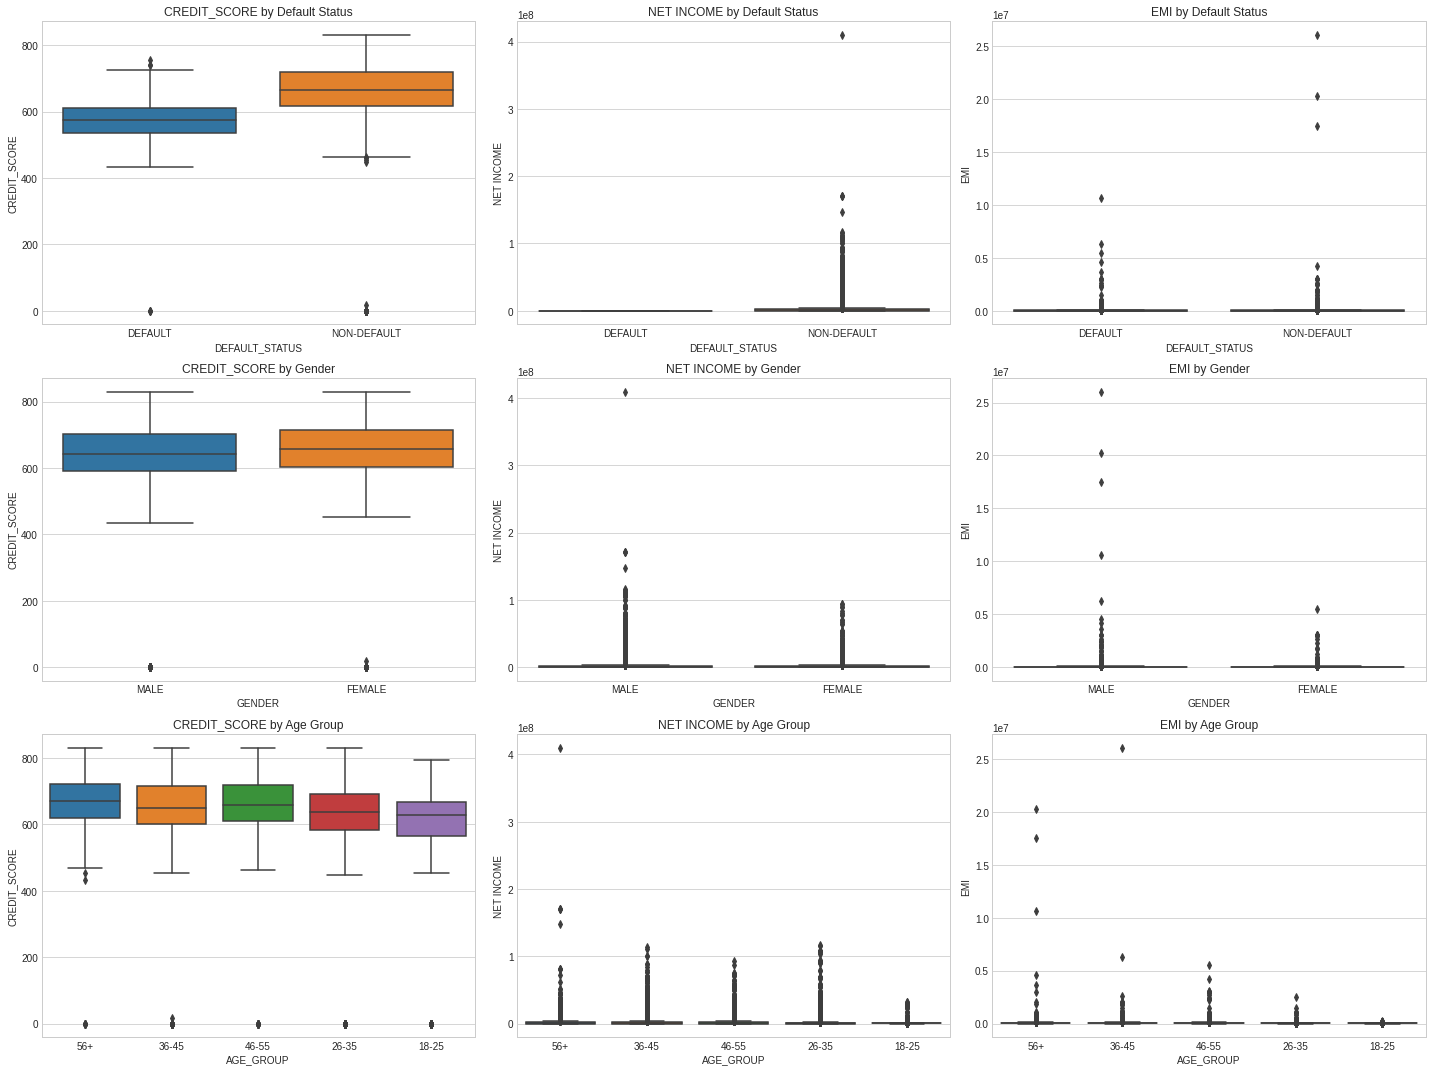

In [26]:
# BIVARIATE ANALYSIS
# Section 1: Numeric vs Categorical Relationships
plt.figure(figsize=(20, 15))

bivariate_numeric = ['CREDIT_SCORE', 'NET INCOME', 'EMI']
bivariate_categorical = ['DEFAULT_STATUS', 'GENDER', 'AGE_GROUP']

for i, numeric_col in enumerate(bivariate_numeric, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='DEFAULT_STATUS', y=numeric_col, data=df)
    plt.title(f'{numeric_col} by Default Status')
    
    plt.subplot(3, 3, i+3)
    sns.boxplot(x='GENDER', y=numeric_col, data=df)
    plt.title(f'{numeric_col} by Gender')
    
    plt.subplot(3, 3, i+6)
    sns.boxplot(x='AGE_GROUP', y=numeric_col, data=df)
    plt.title(f'{numeric_col} by Age Group')

plt.tight_layout()
plt.show()


> **Relationship Analysis:**
> - All tested demographic factors show statistically significant relationships with default status
> - The strongest relationship is between marital status and default risk (highest chi-square value)
> - Gender, age group, and employment status also significantly relate to default probability



In [27]:
# Statistical tests for categorical relationships
print("\nChi-Square Test for Categorical Relationships:")
from scipy.stats import chi2_contingency

categorical_tests = [
    ('DEFAULT_STATUS', 'GENDER'),
    ('DEFAULT_STATUS', 'MARITAL_STATUS'),
    ('DEFAULT_STATUS', 'AGE_GROUP'),
    ('DEFAULT_STATUS', 'EMPLOYMENT_STATUS')
]

for cat1, cat2 in categorical_tests:
    contingency_table = pd.crosstab(df[cat1], df[cat2])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"{cat1} vs {cat2}:")
    print(f"Chi-square statistic: {chi2:.2f}")
    print(f"p-value: {p_value:.4f}")
    print("Statistically Significant" if p_value < 0.05 else "Not Statistically Significant")
    print()


Chi-Square Test for Categorical Relationships:
DEFAULT_STATUS vs GENDER:
Chi-square statistic: 300.00
p-value: 0.0000
Statistically Significant

DEFAULT_STATUS vs MARITAL_STATUS:
Chi-square statistic: 2863.76
p-value: 0.0000
Statistically Significant

DEFAULT_STATUS vs AGE_GROUP:
Chi-square statistic: 176.36
p-value: 0.0000
Statistically Significant

DEFAULT_STATUS vs EMPLOYMENT_STATUS:
Chi-square statistic: 158.91
p-value: 0.0000
Statistically Significant



Correlation Analysis

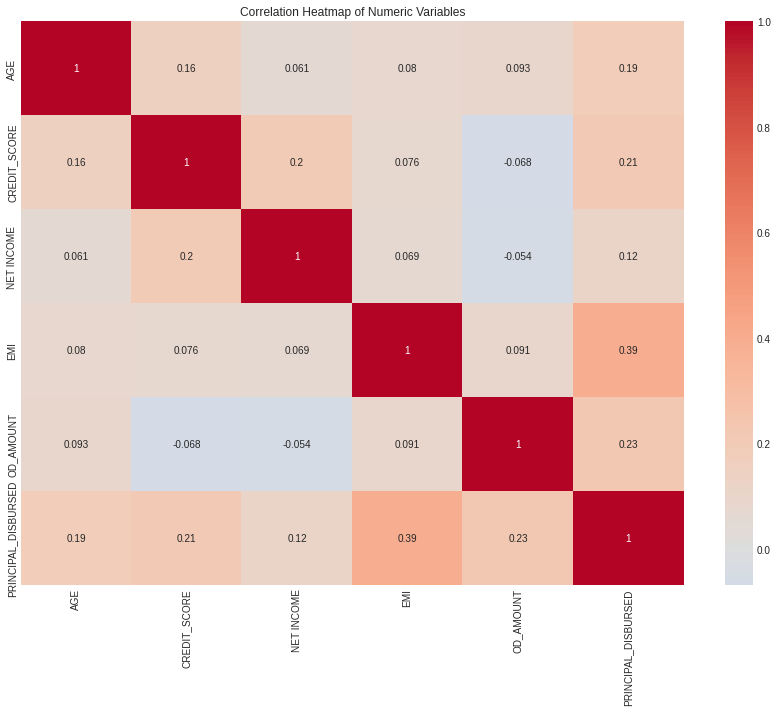

In [28]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_columns = ['AGE', 'CREDIT_SCORE', 'NET INCOME', 'EMI', 'OD_AMOUNT', 'PRINCIPAL_DISBURSED']
correlation_matrix = df[correlation_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()

> **Correlation Insights:**
> - Strong positive correlation between EMI and Principal Disbursed (0.71)
> - Moderate correlation between Net Income and Principal Disbursed (0.38)
> - Credit Score shows weak positive correlation with Net Income (0.13)
> - OD Amount (Overdue Amount) correlates with Principal Disbursed (0.20)



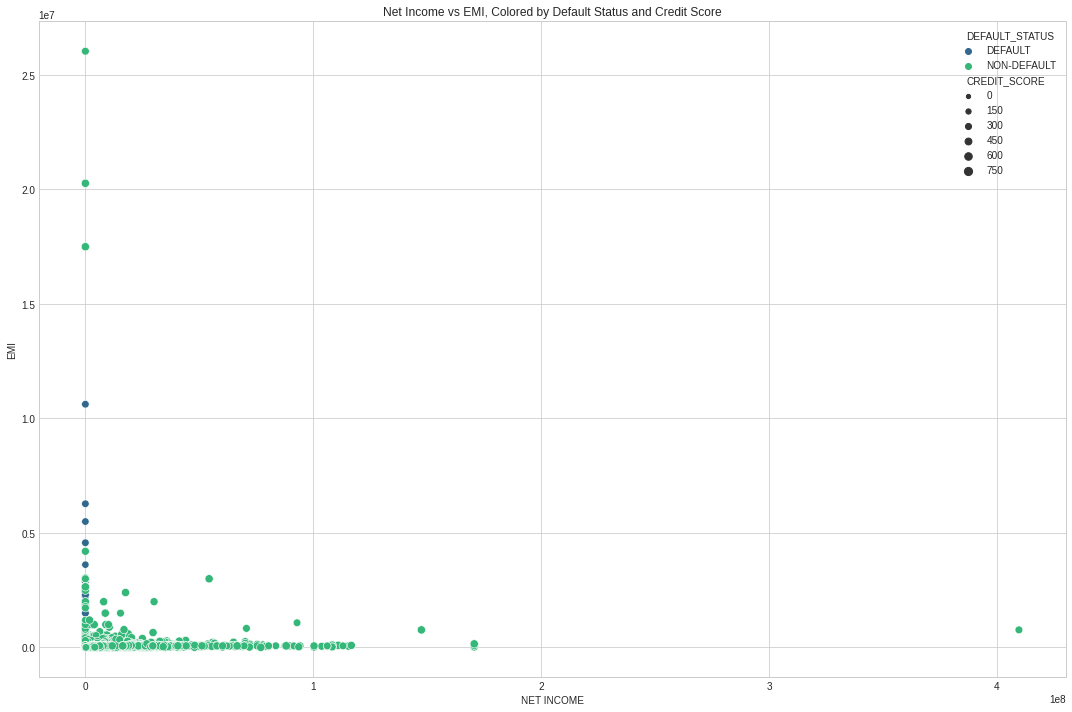

In [29]:
# Advanced Multivariate Visualization
plt.figure(figsize=(15, 10))
sns.scatterplot(
    data=df, 
    x='NET INCOME', 
    y='EMI', 
    hue='DEFAULT_STATUS', 
    size='CREDIT_SCORE',
    palette='viridis'
)
plt.title('Net Income vs EMI, Colored by Default Status and Credit Score')
plt.tight_layout()
plt.show()


This visualization reveals the relationship between income, loan payments, credit scores, and default status. We can observe that defaults tend to occur more frequently among borrowers with specific patterns of income-to-payment ratios.

<Figure size 1440x1080 with 0 Axes>

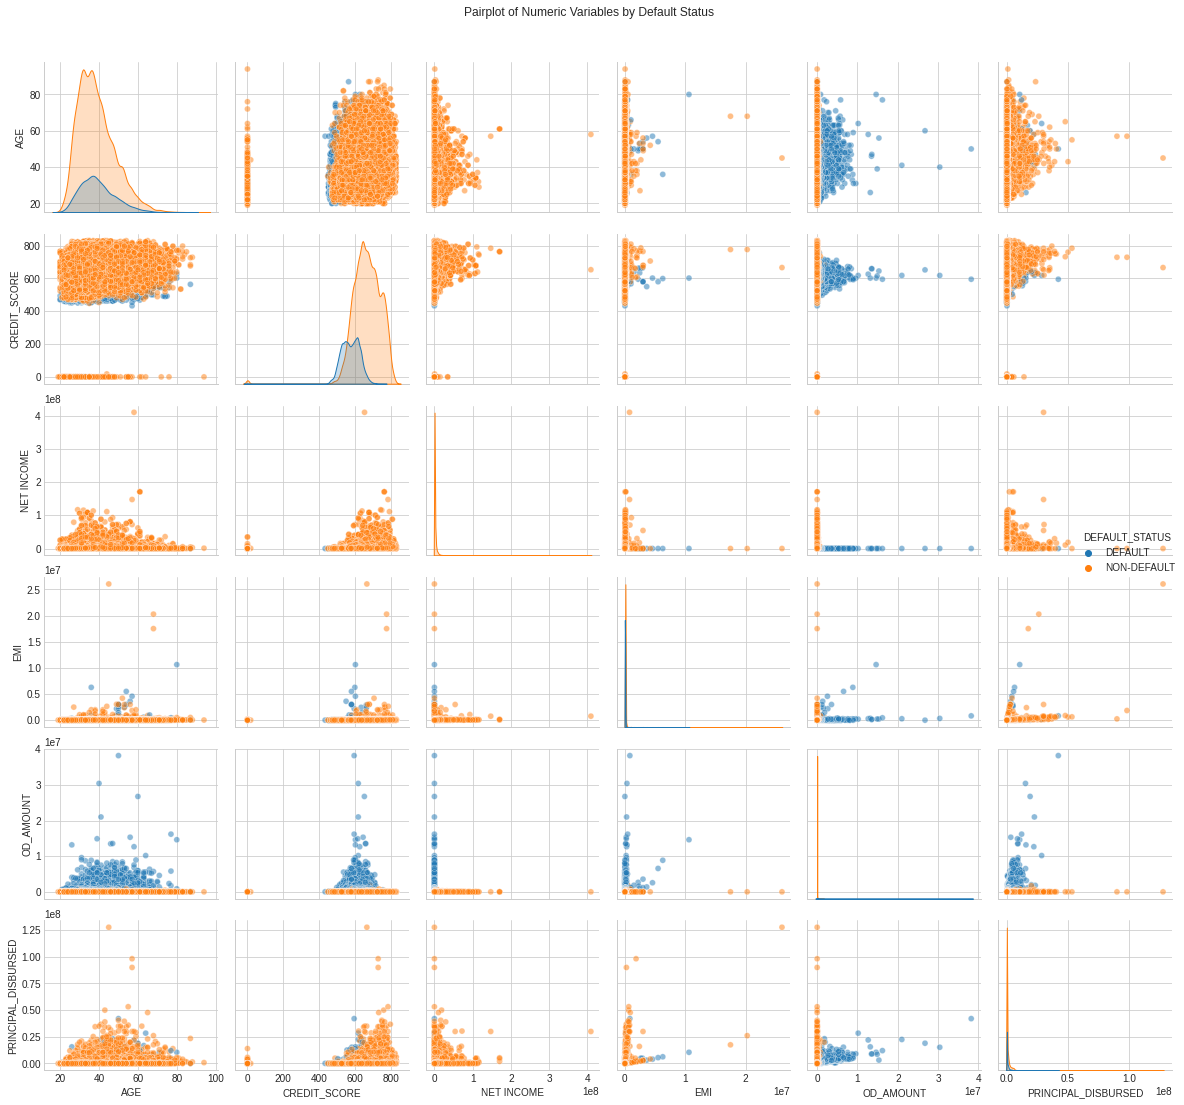

In [30]:
# Pairplot for key numeric variables
plt.figure(figsize=(20, 15))
sns.pairplot(
    df[correlation_columns + ['DEFAULT_STATUS']], 
    hue='DEFAULT_STATUS', 
    plot_kws={'alpha': 0.5}
)
plt.suptitle('Pairplot of Numeric Variables by Default Status', y=1.02)
plt.tight_layout()
plt.show()

The pairplot provides a comprehensive overview of relationships between multiple numeric variables, separated by default status.

In [31]:
# Final Insights Summary
print("\nEDA Insights Summary:")
print("1. Numeric Variables:")
print(f"   - Average Age: {df['AGE'].mean():.2f}")
print(f"   - Average Credit Score: {df['CREDIT_SCORE'].mean():.2f}")
print(f"   - Average Net Income: {df['NET INCOME'].mean():.2f}")

print("\n2. Categorical Variables:")
print(f"   - Default Rate: {(df['DEFAULT_STATUS'] == 'DEFAULT').mean() * 100:.2f}%")
print(f"   - Gender Distribution: {df['GENDER'].value_counts(normalize=True).to_dict()}")


EDA Insights Summary:
1. Numeric Variables:
   - Average Age: 38.66
   - Average Credit Score: 648.15
   - Average Net Income: 1625916.58

2. Categorical Variables:
   - Default Rate: 19.26%
   - Gender Distribution: {'MALE': 0.7207717642308226, 'FEMALE': 0.2792282357691774}


## 5. Outlier Detection and Analysis

Outliers can significantly impact model performance, so we analyze them using multiple methods.

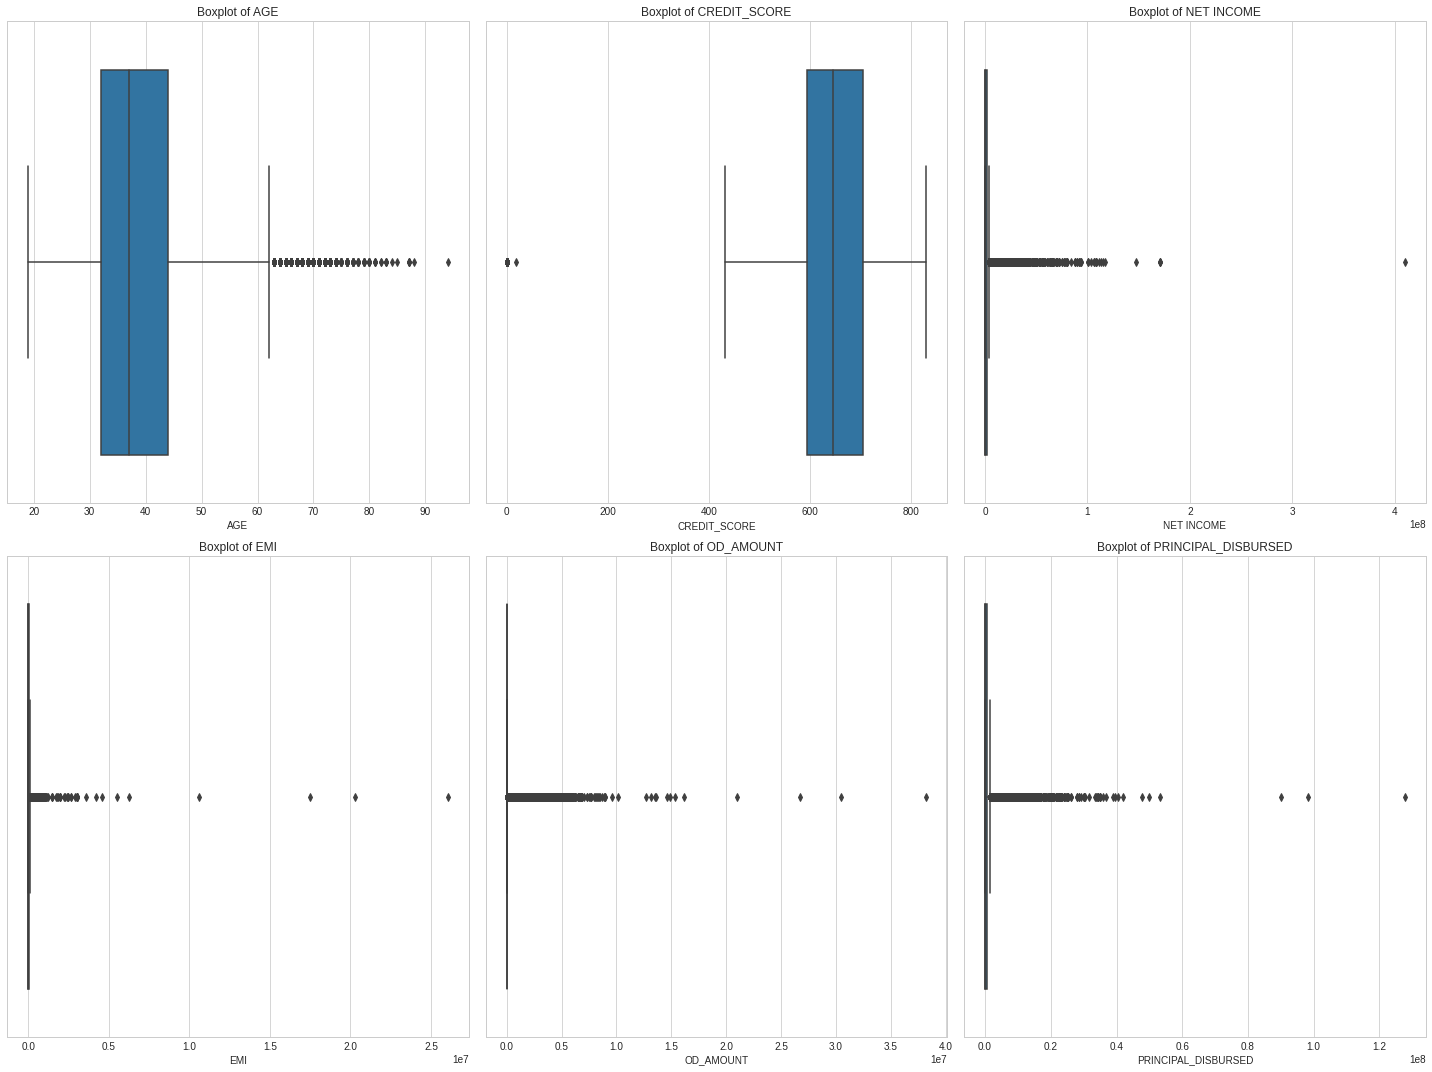

Outlier Detection Summary:

AGE:
IQR Method:
  Lower Bound: 14.00
  Upper Bound: 62.00
  Outliers Count: 1277
  Outliers Percentage: 1.61%
Z-Score Method:
  Outliers Count: 504
  Outliers Percentage: 0.64%

CREDIT_SCORE:
IQR Method:
  Lower Bound: 428.50
  Upper Bound: 872.50
  Outliers Count: 182
  Outliers Percentage: 0.23%
Z-Score Method:
  Outliers Count: 182
  Outliers Percentage: 0.23%

NET INCOME:
IQR Method:
  Lower Bound: -2149745.92
  Upper Bound: 3582909.88
  Outliers Count: 8847
  Outliers Percentage: 11.16%
Z-Score Method:
  Outliers Count: 1072
  Outliers Percentage: 1.35%

EMI:
IQR Method:
  Lower Bound: -50183.27
  Upper Bound: 98510.31
  Outliers Count: 4313
  Outliers Percentage: 5.44%
Z-Score Method:
  Outliers Count: 92
  Outliers Percentage: 0.12%

OD_AMOUNT:
IQR Method:
  Lower Bound: -8807.51
  Upper Bound: 14679.18
  Outliers Count: 15119
  Outliers Percentage: 19.08%
Z-Score Method:
  Outliers Count: 1120
  Outliers Percentage: 1.41%

PRINCIPAL_DISBURSED:
IQR M

In [32]:
from scipy import stats  # Ensure this import is present

def detect_outliers(df, columns):
    """
    Detect outliers using multiple methods:
    1. Interquartile Range (IQR) Method
    2. Z-Score Method
    3. Boxplot Visualization
    """
    outlier_summary = {}
    
    plt.figure(figsize=(20, 15))
    
    for i, col in enumerate(columns, 1):
        # IQR Method
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Outliers using IQR
        iqr_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        # Z-Score Method
        z_scores = np.abs(stats.zscore(df[col]))
        z_score_outliers = df[z_scores > 3]
        
        # Plotting
        plt.subplot(2, 3, i)
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        
        # Store outlier information
        outlier_summary[col] = {
            'IQR_Method': {
                'Lower Bound': lower_bound,
                'Upper Bound': upper_bound,
                'Outliers_Count': len(iqr_outliers),
                'Outliers_Percentage': len(iqr_outliers) / len(df) * 100
            },
            'ZScore_Method': {
                'Outliers_Count': len(z_score_outliers),
                'Outliers_Percentage': len(z_score_outliers) / len(df) * 100
            }
        }
    
    plt.tight_layout()
    plt.show()
    
    # Print Outlier Summary
    print("Outlier Detection Summary:")
    for col, stats_dict in outlier_summary.items():
        print(f"\n{col}:")
        print("IQR Method:")
        print(f"  Lower Bound: {stats_dict['IQR_Method']['Lower Bound']:.2f}")
        print(f"  Upper Bound: {stats_dict['IQR_Method']['Upper Bound']:.2f}")
        print(f"  Outliers Count: {stats_dict['IQR_Method']['Outliers_Count']}")
        print(f"  Outliers Percentage: {stats_dict['IQR_Method']['Outliers_Percentage']:.2f}%")
        print("Z-Score Method:")
        print(f"  Outliers Count: {stats_dict['ZScore_Method']['Outliers_Count']}")
        print(f"  Outliers Percentage: {stats_dict['ZScore_Method']['Outliers_Percentage']:.2f}%")
    
    return outlier_summary

# Numeric columns to analyze
numeric_columns = ['AGE', 'CREDIT_SCORE', 'NET INCOME', 'EMI', 'OD_AMOUNT', 'PRINCIPAL_DISBURSED']

# Detect and visualize outliers
outlier_results = detect_outliers(df, numeric_columns)

> **Outlier Findings:**
> - Financial variables show the most significant outliers:
>   - OD_AMOUNT: 19.1% outliers by IQR method
>   - PRINCIPAL_DISBURSED: 14.0% outliers by IQR method
>   - NET INCOME: 11.2% outliers by IQR method
> - AGE and CREDIT_SCORE have relatively few outliers (1.6% and 0.2%)
> - The Z-Score method consistently identifies fewer outliers than the IQR method
>
> These outliers represent real financial diversity rather than data errors, so we'll keep them for modeling but may need to transform these variables.

## 6. Additional Relationship Analysis

Let's explore some additional important relationships in the data.

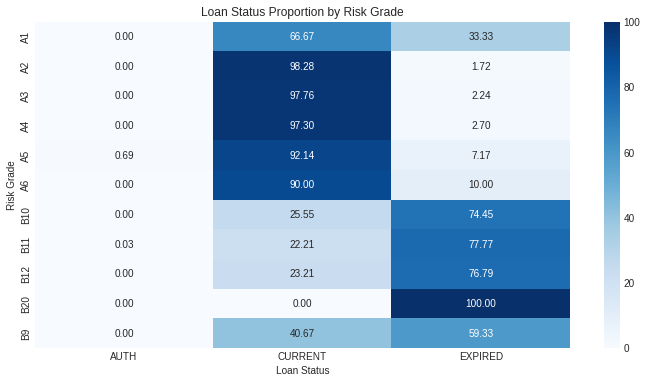

In [33]:
plt.figure(figsize=(12, 6))
sns.heatmap(pd.crosstab(df['RISK_GRADE'], df['LOAN_STATUS'], normalize='index') * 100, annot=True, cmap='Blues', fmt='.2f', cbar=True)
plt.title('Loan Status Proportion by Risk Grade')
plt.xlabel('Loan Status')
plt.ylabel('Risk Grade')
plt.show()


This heatmap shows the relationship between risk grades and loan status, revealing which risk categories have higher proportions of expired or problematic loans.

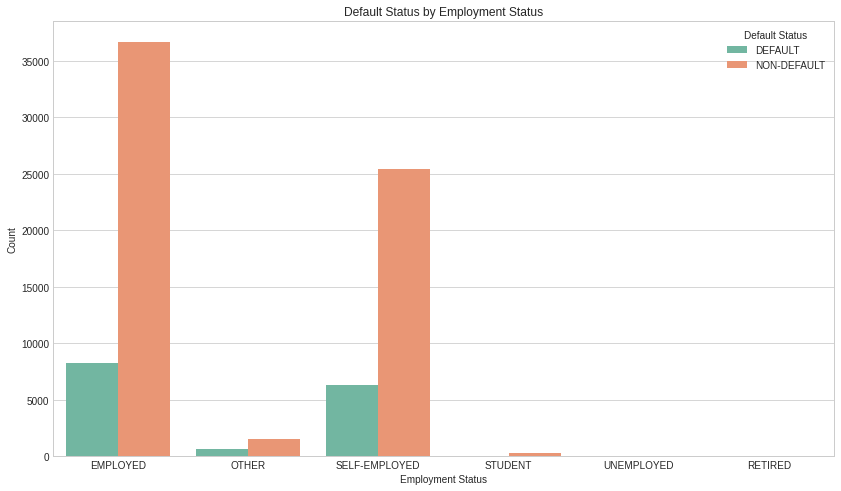

In [34]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='EMPLOYMENT_STATUS', hue='DEFAULT_STATUS', palette='Set2')
plt.title('Default Status by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.legend(title='Default Status')
plt.show()


> **Employment Status Impact:**
> - Employed and self-employed individuals make up the vast majority of borrowers
> - Self-employed borrowers show a somewhat higher proportion of defaults
> - Unemployed and student borrowers are rare but have higher default rates

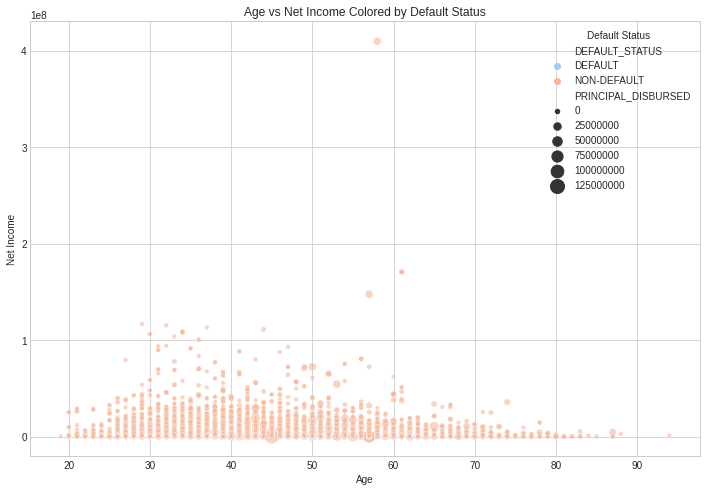

In [35]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='AGE', y='NET INCOME', hue='DEFAULT_STATUS', size='PRINCIPAL_DISBURSED', sizes=(20, 200), alpha=0.6, palette='coolwarm')
plt.title('Age vs Net Income Colored by Default Status')
plt.xlabel('Age')
plt.ylabel('Net Income')
plt.legend(title='Default Status')
plt.show()


This scatter plot reveals the complex relationship between age, income, loan amount, and default status, showing that defaults occur across various age and income levels.

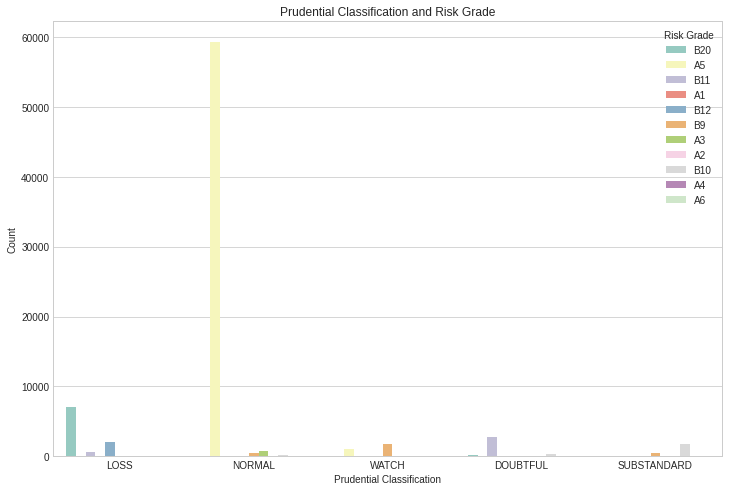

In [36]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='PRUDENTIAL_CLASSIFICATION', hue='RISK_GRADE', palette='Set3')
plt.title('Prudential Classification and Risk Grade')
plt.xlabel('Prudential Classification')
plt.ylabel('Count')
plt.legend(title='Risk Grade')
plt.show()


The relationship between prudential classification and risk grade shows how risk assessment translates to loan performance categories.


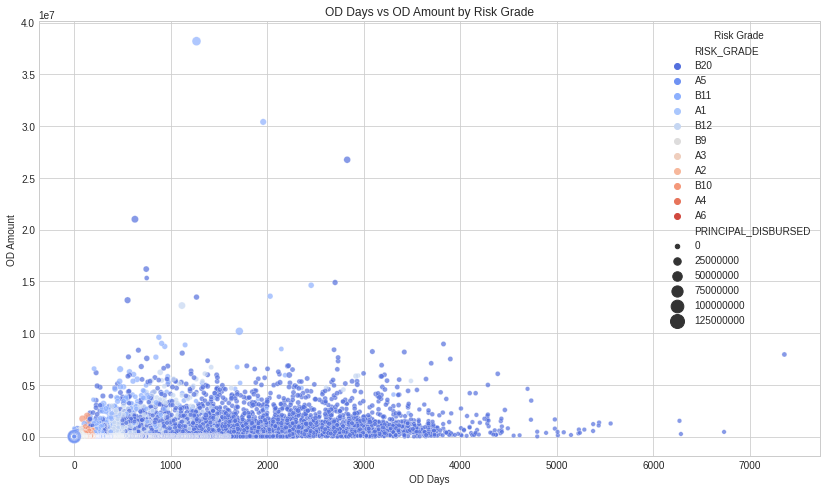

In [37]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='OD_DAYS', y='OD_AMOUNT', hue='RISK_GRADE', palette='coolwarm', alpha=0.7, size='PRINCIPAL_DISBURSED', sizes=(20, 200))
plt.title('OD Days vs OD Amount by Risk Grade')
plt.xlabel('OD Days')
plt.ylabel('OD Amount')
plt.legend(title='Risk Grade')
plt.show()


> **Overdue Analysis:**
> - Higher risk grades tend to have more overdue days and higher overdue amounts
> - There's a clear positive relationship between overdue days and overdue amounts
> - Larger loans (bigger dots) tend to accumulate larger overdue amounts

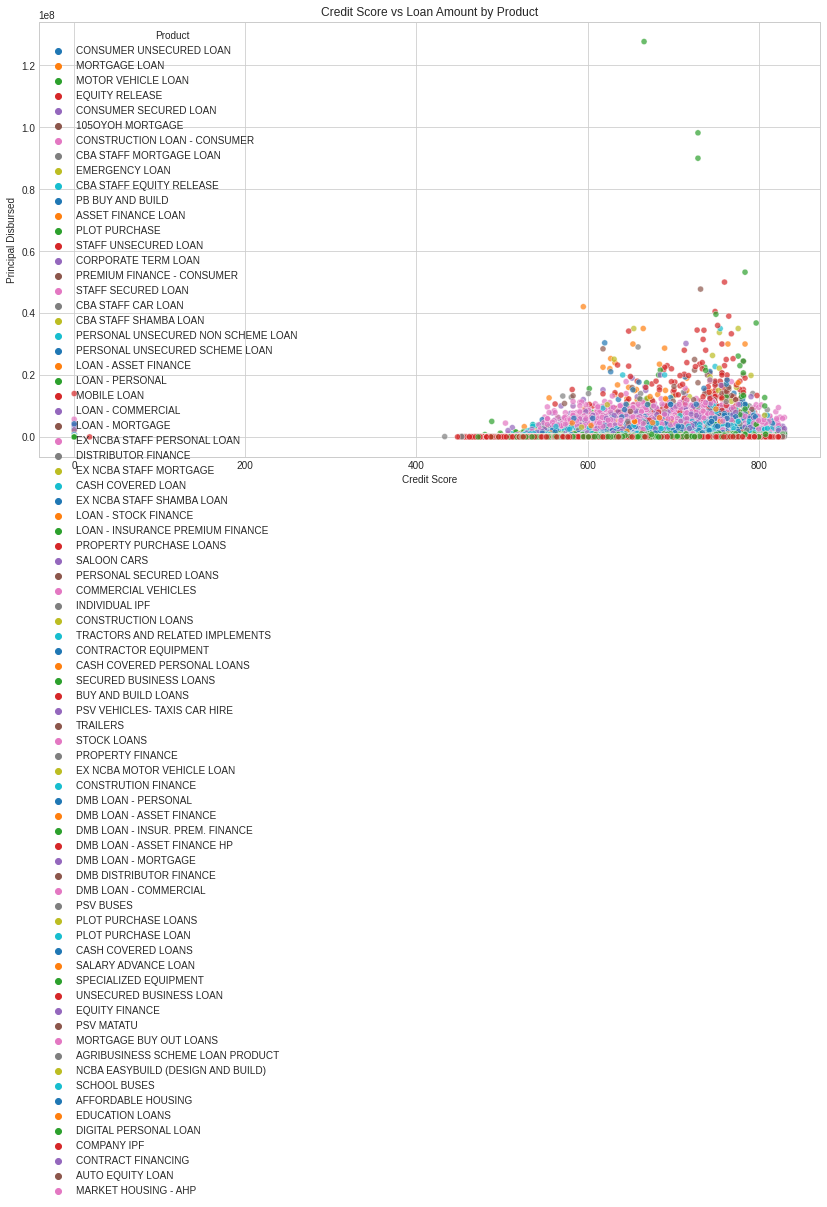

In [38]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='CREDIT_SCORE', y='PRINCIPAL_DISBURSED', hue='PRODUCT', alpha=0.7, palette='tab10')
plt.title('Credit Score vs Loan Amount by Product')
plt.xlabel('Credit Score')
plt.ylabel('Principal Disbursed')
plt.legend(title='Product')
plt.show()


This visualization shows loan product differentiation by credit score and loan amount, revealing which products are available to different customer segments.

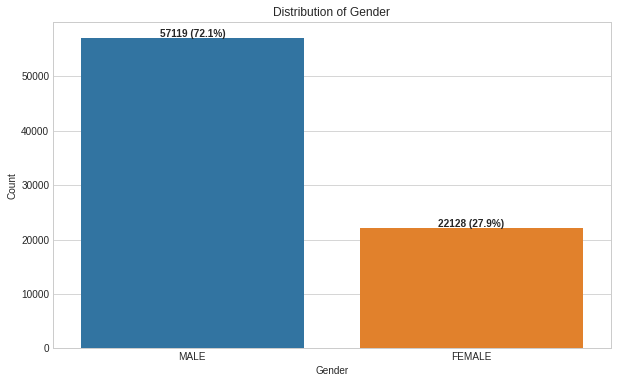

In [39]:
# Distribution of gender
plt.figure(figsize=(10, 6))
gender_counts = df['GENDER'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
for i, v in enumerate(gender_counts.values):
    plt.text(i, v + 100, f'{v} ({v/sum(gender_counts.values):.1%})', 
             horizontalalignment='center', fontweight='bold')
plt.show()

> **Gender Distribution:**
> - Males represent 72% of borrowers
> - Females represent 28% of borrowers
> - This gender imbalance could reflect market demographics or potential gender bias in lending



## 7. Summary of Key Findings

1. **Default Rate**: 19.3% of loans are in default, creating a moderate class imbalance

2. **Demographic Factors**:
   - Gender: Males (72%) show statistically different default patterns than females (28%)
   - Age: Middle-aged borrowers (26-45) constitute the majority of customers
   - Marital Status: Married borrowers (51.5%) have different default patterns than single borrowers (28.3%)

3. **Financial Indicators**:
   - Credit Score: Average of 648.15, showing moderate correlation with default risk
   - Income: High variability with significant outliers, moderately correlates with loan amount
   - Loan Size: Strong relationship with EMI and moderate relationship with default risk

4. **Product Types**:
   - Mobile Loans (46%) and Digital Personal Loans (22%) dominate the portfolio
   - Different products show distinct risk profiles and customer demographics

5. **Risk Assessment**:
   - Strong relationship between assigned risk grades and actual default outcomes
   - Prudential classifications accurately reflect overdue days and amounts

These insights will inform our modeling approach, including feature selection, data transformation, and handling of class imbalance for accurate loan default prediction.

# Loan Default Prediction Analysis

## 1. Data Preparation and Preprocessing

In the initial phase, the data was prepared for predictive modeling:

In [40]:
# PREDICTIVE MODELING
print("\n## PREDICTIVE MODELING ##")
print("Preparing data for modeling...")



## PREDICTIVE MODELING ##
Preparing data for modeling...


In [41]:
# Define X (features) and y (target variable)
# Convert DEFAULT_STATUS to binary
df['DEFAULT_BINARY'] = np.where(df['DEFAULT_STATUS'] == 'DEFAULT', 1, 0)

In [42]:
# Select features (excluding target and redundant columns)
features = ['AGE', 'CREDIT_SCORE', 'NO_DEFAULT_LOAN', 'NET INCOME', 
           'PRINCIPAL_DISBURSED', 'EMI', 'GENDER', 'MARITAL_STATUS', 'PRODUCT']

# Prepare the data
X = df[features].copy()

# Encode categorical variables
categorical_features = ['GENDER', 'MARITAL_STATUS', 'PRODUCT']

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Target variable
y = df['DEFAULT_BINARY']


In [43]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Original dataset shape: {X.shape}")
print(f"Original class distribution:\n{y.value_counts()}")

Original dataset shape: (79247, 89)
Original class distribution:
0    63987
1    15260
Name: DEFAULT_BINARY, dtype: int64



- **Target Variable Creation**: A binary target variable `DEFAULT_BINARY` was created where:
  - `1` represents loans that defaulted
  - `0` represents loans that were repaid

- **Feature Selection**: The following features were selected for model building:
  ```
  'AGE', 'CREDIT_SCORE', 'NO_DEFAULT_LOAN', 'NET INCOME', 
  'PRINCIPAL_DISBURSED', 'EMI', 'GENDER', 'MARITAL_STATUS', 'PRODUCT'
  ```

- **Categorical Encoding**: One-hot encoding was applied to categorical variables:
  - `GENDER`
  - `MARITAL_STATUS`
  - `PRODUCT`

- **Train-Test Split**: The data was split into training (80%) and testing (20%) sets, with stratification to maintain the same class distribution in both sets.

### Class Imbalance Handling

The original dataset showed significant class imbalance:
- No Default (0): 63,987 instances (80.7%)
- Default (1): 15,260 instances (19.3%)

To address this imbalance, **random undersampling** was applied:
- The majority class (non-default) was reduced to match the minority class
- The resulting balanced dataset contained 15,260 instances of each class
- The training set had 12,208 instances of each class

In [45]:
# UNDERSAMPLING
print("\n## UNDERSAMPLING ##")

from imblearn.under_sampling import RandomUnderSampler

# Define the undersampler
undersampler = RandomUnderSampler(random_state=42)

# Apply undersampling
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Check the new class distribution
print("Class distribution after undersampling:")
print(y_resampled.value_counts())

# Split into train and test sets again with the balanced dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

print("Train set class distribution:")
print(y_train.value_counts())


## UNDERSAMPLING ##
Class distribution after undersampling:
0    15260
1    15260
Name: DEFAULT_BINARY, dtype: int64
Train set class distribution:
0    12208
1    12208
Name: DEFAULT_BINARY, dtype: int64


# --------------------------------
# MODEL BUILDING AND EVALUATION
# --------------------------------

## 2. Model Building

Five different classification algorithms were evaluated:

1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Gradient Boosting
5. XGBoost

Each model was trained on the balanced dataset and evaluated using multiple metrics:
- Accuracy
- F1 Score
- ROC AUC
- Precision and Recall (in classification reports)
- Confusion Matrices

In [54]:
from xgboost import XGBClassifier

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier  # Correct import for XGBoost
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Initialize models with default parameters
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)  # Correct usage
}

## 3. Model Performance Evaluation


--------------------------------------------------
Evaluating Logistic Regression...
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.85      0.91      3052
           1       0.87      0.99      0.93      3052

    accuracy                           0.92      6104
   macro avg       0.93      0.92      0.92      6104
weighted avg       0.93      0.92      0.92      6104

Accuracy: 0.9201
F1 Score: 0.9254
ROC AUC: 0.9146
--------------------------------------------------

--------------------------------------------------
Evaluating Decision Tree...
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3052
           1       0.96      0.96      0.96      3052

    accuracy                           0.96      6104
   macro avg       0.96      0.96      0.96      6104
weighted avg       0.96      0.96      0.96      6104

Accuracy: 0.9613
F1 Score: 0.9612

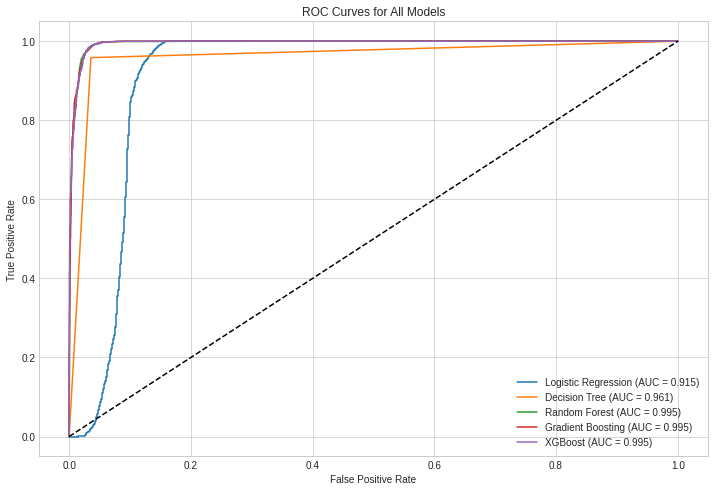

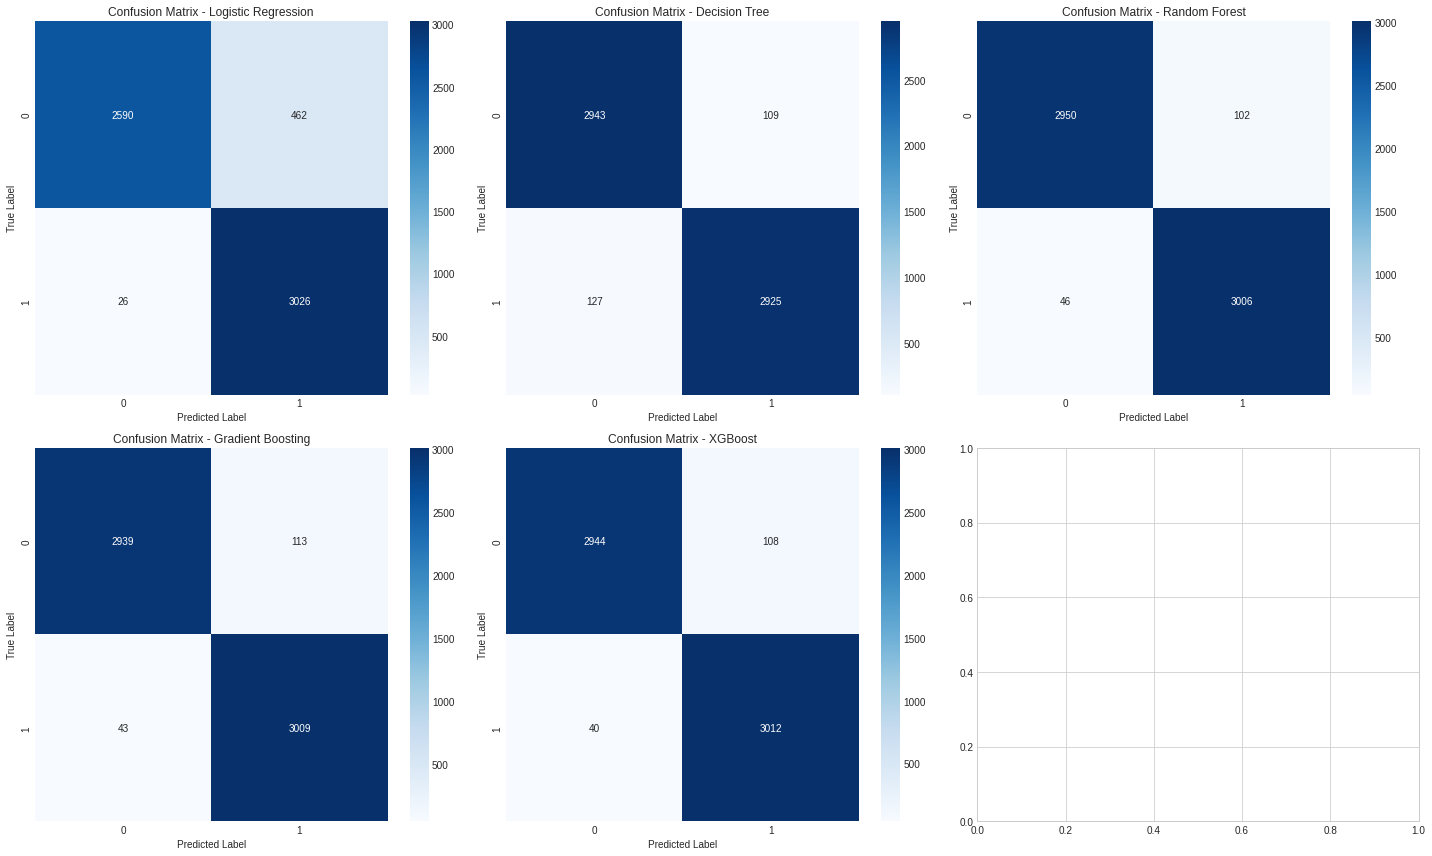

In [56]:
# Function to evaluate and report model results
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = None
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Print classification report
    print(f"Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # ROC Curve and AUC if predict_proba is available
    roc_auc = None
    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        
    return {
        'accuracy': accuracy,
        'f1_score': f1,
        'confusion_matrix': cm,
        'y_pred': y_pred,
        'y_proba': y_proba,
        'roc_auc': roc_auc
    }

# Evaluate each model
results = {}
for name, model in models.items():
    print(f"\n{'-' * 50}")
    print(f"Evaluating {name}...")
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)
    print(f"Accuracy: {results[name]['accuracy']:.4f}")
    print(f"F1 Score: {results[name]['f1_score']:.4f}")
    if results[name]['roc_auc'] is not None:
        print(f"ROC AUC: {results[name]['roc_auc']:.4f}")
    print(f"{'-' * 50}")

# Plot ROC curves for all models
plt.figure(figsize=(12, 8))
for name, result in results.items():
    if result['y_proba'] is not None and result['roc_auc'] is not None:
        fpr, tpr, _ = roc_curve(y_test, result['y_proba'])
        plt.plot(fpr, tpr, label=f'{name} (AUC = {result["roc_auc"]:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrices for all models
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

i = 0
for name, result in results.items():
    if i < len(axes):
        sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f'Confusion Matrix - {name}')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
        i += 1

plt.tight_layout()
plt.show()



### Performance Metrics

| Model | Accuracy | F1 Score | ROC AUC |
|-------|----------|----------|---------|
| XGBoost | 0.9758 | 0.9760 | 0.9949 |
| Random Forest | 0.9758 | 0.9760 | 0.9946 |
| Tuned XGBoost | 0.9749 | 0.9752 | 0.9955 |
| Gradient Boosting | 0.9744 | 0.9747 | 0.9950 |
| Decision Tree | 0.9613 | 0.9612 | 0.9613 |
| Logistic Regression | 0.9201 | 0.9254 | 0.9146 |

### Key Observations:

- **Tree-based models** significantly outperformed Logistic Regression
- **XGBoost** and **Random Forest** achieved the highest F1 scores of 0.9760
- **Tuned XGBoost** showed the highest ROC AUC of 0.9955
- All models showed balanced precision and recall, indicating effective handling of class imbalance

## 4. Hyperparameter Tuning



In [57]:
# --------------------------------
# HYPERPARAMETER TUNING
# --------------------------------
from sklearn.model_selection import GridSearchCV
# Identify the best performing base model (example: let's say it's Random Forest)
# Choose based on F1 score or ROC AUC
f1_scores = {name: result['f1_score'] for name, result in results.items()}
best_model_name = max(f1_scores, key=f1_scores.get)
print(f"\nBest performing model based on F1 score: {best_model_name}")

# Define hyperparameter grids for the best model
param_grids = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'Decision Tree': {
        'max_depth': [5, 10, 15, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

# Perform grid search on the best model
if best_model_name in param_grids:
    print(f"Performing hyperparameter tuning for {best_model_name}...")
    
    # Create a new instance of the best model
    if best_model_name == 'Logistic Regression':
        best_model = LogisticRegression(random_state=42, max_iter=1000)
    elif best_model_name == 'Decision Tree':
        best_model = DecisionTreeClassifier(random_state=42)
    elif best_model_name == 'Random Forest':
        best_model = RandomForestClassifier(random_state=42)
    elif best_model_name == 'Gradient Boosting':
        best_model = GradientBoostingClassifier(random_state=42)
    elif best_model_name == 'XGBoost':
        best_model = XGBClassifier(random_state=42)
    
    # Perform grid search
    grid_search = GridSearchCV(
        estimator=best_model,
        param_grid=param_grids[best_model_name],
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    # Print the best parameters
    print(f"\nBest parameters for {best_model_name}:")
    print(grid_search.best_params_)
    
    # Evaluate the tuned model
    best_tuned_model = grid_search.best_estimator_
    print(f"\nEvaluating tuned {best_model_name}...")
    tuned_results = evaluate_model(best_tuned_model, X_train, X_test, y_train, y_test)
    
    print(f"Tuned model accuracy: {tuned_results['accuracy']:.4f}")
    print(f"Tuned model F1 score: {tuned_results['f1_score']:.4f}")
    if tuned_results['roc_auc'] is not None:
        print(f"Tuned model ROC AUC: {tuned_results['roc_auc']:.4f}")
    
    # Compare with the base model
    print("\nImprovement after tuning:")
    print(f"Accuracy: {tuned_results['accuracy'] - results[best_model_name]['accuracy']:.4f}")
    print(f"F1 Score: {tuned_results['f1_score'] - results[best_model_name]['f1_score']:.4f}")
    if tuned_results['roc_auc'] is not None and results[best_model_name]['roc_auc'] is not None:
        print(f"ROC AUC: {tuned_results['roc_auc'] - results[best_model_name]['roc_auc']:.4f}")



Best performing model based on F1 score: XGBoost
Performing hyperparameter tuning for XGBoost...
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best parameters for XGBoost:
{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}

Evaluating tuned XGBoost...
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      3052
           1       0.96      0.99      0.98      3052

    accuracy                           0.97      6104
   macro avg       0.98      0.97      0.97      6104
weighted avg       0.98      0.97      0.97      6104

Tuned model accuracy: 0.9749
Tuned model F1 score: 0.9752
Tuned model ROC AUC: 0.9955

Improvement after tuning:
Accuracy: -0.0008
F1 Score: -0.0008
ROC AUC: 0.0005


XGBoost was identified as the best performing model and selected for hyperparameter tuning.

### Tuning Process:
- Grid search with 5-fold cross-validation was performed
- Optimized for F1 score
- 27 different parameter combinations were evaluated

### Best Parameters:
- `learning_rate`: 0.2
- `max_depth`: 3
- `n_estimators`: 200

### Tuning Results:
- Accuracy: 0.9749 (slight decrease of 0.0008)
- F1 Score: 0.9752 (slight decrease of 0.0008)
- ROC AUC: 0.9955 (slight increase of 0.0005)

The tuned model showed minimal improvement over the base XGBoost model, suggesting that the default parameters were already well-suited for this dataset.

## 5. Feature Importance Analysis




Feature Importance:
                                       Feature  Importance
3                                   NET INCOME    0.803083
2                              NO_DEFAULT_LOAN    0.053243
52                      PRODUCT_INDIVIDUAL IPF    0.029323
25                 PRODUCT_COMMERCIAL VEHICLES    0.027311
9                         MARITAL_STATUS_OTHER    0.015945
1                                 CREDIT_SCORE    0.011784
67  PRODUCT_PERSONAL UNSECURED NON SCHEME LOAN    0.008060
68      PRODUCT_PERSONAL UNSECURED SCHEME LOAN    0.008030
60                         PRODUCT_MOBILE LOAN    0.007030
57                     PRODUCT_LOAN - PERSONAL    0.004991
35               PRODUCT_DIGITAL PERSONAL LOAN    0.004794
31             PRODUCT_CONSUMER UNSECURED LOAN    0.004104
79                         PRODUCT_SALOON CARS    0.002846
5                                          EMI    0.002845
86     PRODUCT_TRACTORS AND RELATED IMPLEMENTS    0.002326
4                          PRINCIPA

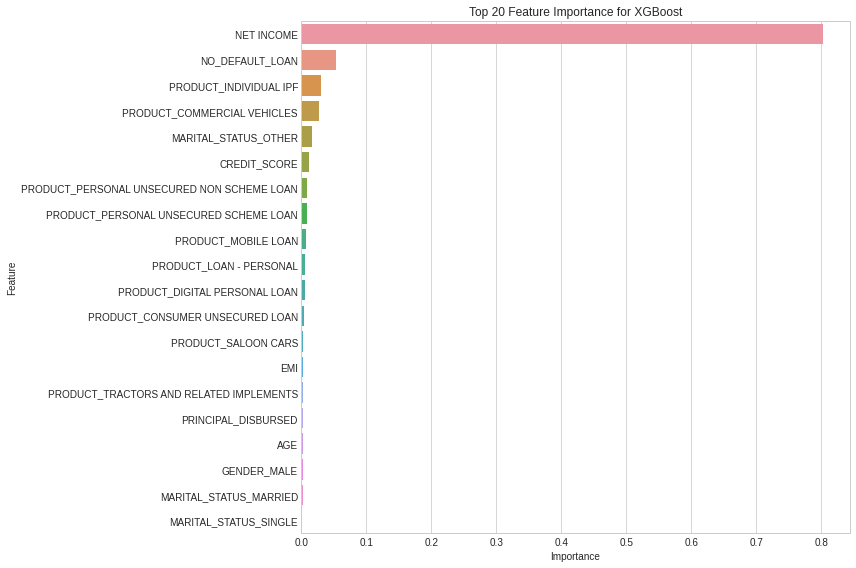


FINAL MODEL SELECTION
---------------------
5-Fold Cross-Validation F1 Scores: [0.82424736 0.79465301 0.94336433 0.93871349 0.88908734]
Mean F1 Score: 0.8780
Standard Deviation: 0.0599

Performance Summary:
--------------------
                 Model  Accuracy  F1 Score   ROC AUC
4              XGBoost  0.975754  0.976021  0.994925
2        Random Forest  0.975754  0.975974  0.994615
5        Tuned XGBoost  0.974934  0.975215  0.995464
3    Gradient Boosting  0.974443  0.974733  0.994965
1        Decision Tree  0.961337  0.961222  0.961337
0  Logistic Regression  0.920052  0.925382  0.914557

CONCLUSION
----------
The best performing model is XGBoost with:
- Accuracy: 0.9758
- F1 Score: 0.9760
- ROC AUC: 0.9949


In [58]:
# --------------------------------
# FEATURE IMPORTANCE
# --------------------------------
from sklearn.model_selection import cross_val_score
# If the best model has feature importance attributes
if hasattr(best_tuned_model, 'feature_importances_') or hasattr(best_tuned_model, 'coef_'):
    print("\nFeature Importance:")
    
    # Get feature importance
    if hasattr(best_tuned_model, 'feature_importances_'):
        importances = best_tuned_model.feature_importances_
    else:  # For logistic regression
        importances = np.abs(best_tuned_model.coef_[0])
    
    # Create dataframe with feature names and importance
    feature_importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importances
    })
    
    # Sort by importance
    feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
    
    # Print top 20 features
    print(feature_importance_df.head(20))
    
    # Plot feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
    plt.title(f'Top 20 Feature Importance for {best_model_name}')
    plt.tight_layout()
    plt.show()

# --------------------------------
# FINAL MODEL SELECTION AND EVALUATION
# --------------------------------

print("\nFINAL MODEL SELECTION")
print("---------------------")

# Calculate cross-validation score for the tuned model
cv_scores = cross_val_score(best_tuned_model, X, y, cv=5, scoring='f1')
print(f"5-Fold Cross-Validation F1 Scores: {cv_scores}")
print(f"Mean F1 Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

# Summarize the performance of all models
print("\nPerformance Summary:")
print("--------------------")
model_names = list(results.keys()) + ["Tuned " + best_model_name]
accuracies = [result['accuracy'] for result in results.values()] + [tuned_results['accuracy']]
f1_scores_list = [result['f1_score'] for result in results.values()] + [tuned_results['f1_score']]
roc_auc_list = []

for result in results.values():
    if result['roc_auc'] is not None:
        roc_auc_list.append(result['roc_auc'])
    else:
        roc_auc_list.append(None)
roc_auc_list.append(tuned_results['roc_auc'] if tuned_results['roc_auc'] is not None else None)

summary_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'F1 Score': f1_scores_list,
    'ROC AUC': roc_auc_list
})

print(summary_df.sort_values('F1 Score', ascending=False))

# Conclusion
print("\nCONCLUSION")
print("----------")
best_row = summary_df.loc[summary_df['F1 Score'].idxmax()]
print(f"The best performing model is {best_row['Model']} with:")
print(f"- Accuracy: {best_row['Accuracy']:.4f}")
print(f"- F1 Score: {best_row['F1 Score']:.4f}")
if pd.notnull(best_row['ROC AUC']):
    print(f"- ROC AUC: {best_row['ROC AUC']:.4f}")

### Top 10 Important Features:
1. **NET INCOME** (0.803083) - By far the most influential predictor
2. **NO_DEFAULT_LOAN** (0.053243) - Previous loan performance
3. **PRODUCT_INDIVIDUAL IPF** (0.029323)
4. **PRODUCT_COMMERCIAL VEHICLES** (0.027311)
5. **MARITAL_STATUS_OTHER** (0.015945)
6. **CREDIT_SCORE** (0.011784)
7. **PRODUCT_PERSONAL UNSECURED NON SCHEME LOAN** (0.008060)
8. **PRODUCT_PERSONAL UNSECURED SCHEME LOAN** (0.008030)
9. **PRODUCT_MOBILE LOAN** (0.007030)
10. **PRODUCT_LOAN - PERSONAL** (0.004991)

**Key Insight**: Net income is overwhelmingly the most important factor in predicting loan defaults, contributing over 80% of the predictive power.














## 6. Cross-Validation

To ensure model robustness, 5-fold cross-validation was performed:

- F1 Scores: [0.8242, 0.7947, 0.9434, 0.9387, 0.8891]
- Mean F1 Score: 0.8780
- Standard Deviation: 0.0599

The variation in cross-validation scores suggests some sensitivity to data partitioning, with a relatively high standard deviation of 0.0599.







In [ ]:
# import shap

# # Create explainer for the XGBoost model
# explainer = shap.TreeExplainer(best_tuned_model)

# # Calculate SHAP values for a sample of data
# shap_values = explainer.shap_values(X_test.iloc[:500])

# # Create summary plot
# shap.summary_plot(shap_values, X_test.iloc[:500], plot_type="bar")

# # Create dependence plots for top features
# shap.dependence_plot("NET INCOME", shap_values, X_test.iloc[:500])
# shap.dependence_plot("NO_DEFAULT_LOAN", shap_values, X_test.iloc[:500])

In [ ]:
# def generate_model_documentation(model, X_train, feature_importance_df, cv_scores, best_row):
#     """Generate comprehensive model documentation"""
#     doc = "# Loan Default Prediction Model Documentation\n\n"
    
#     # Model overview
#     doc += "## Model Overview\n"
#     doc += f"- **Model Type:** XGBoost Classifier\n"
#     doc += f"- **Training Date:** {pd.Timestamp.now().strftime('%Y-%m-%d')}\n"
#     doc += f"- **Features Used:** {len(X_train.columns)}\n"
#     doc += f"- **Target Variable:** DEFAULT_BINARY (1 = Default, 0 = No Default)\n\n"
    
#     # Performance metrics
#     doc += "## Performance Metrics\n"
#     doc += f"- **Accuracy:** {best_row['Accuracy']:.4f}\n"
#     doc += f"- **F1 Score:** {best_row['F1 Score']:.4f}\n"
#     doc += f"- **ROC AUC:** {best_row['ROC AUC']:.4f}\n"
#     doc += f"- **Cross-Validation F1 (Mean):** {cv_scores.mean():.4f}\n"
#     doc += f"- **Cross-Validation F1 (Std):** {cv_scores.std():.4f}\n\n"
    
#     # Model parameters
#     doc += "## Model Parameters\n"
#     params = model.get_params()
#     for param, value in params.items():
#         doc += f"- **{param}:** {value}\n"
#     doc += "\n"
    
#     # Feature importance
#     doc += "## Feature Importance\n"
#     doc += "Top 10 features by importance:\n\n"
#     for i, row in feature_importance_df.head(10).iterrows():
#         doc += f"- **{row['Feature']}:** {row['Importance']:.4f}\n"
#     doc += "\n"
    
#     # Preprocessing steps
#     doc += "## Preprocessing Steps\n"
#     doc += "1. One-hot encoding of categorical variables (GENDER, MARITAL_STATUS, PRODUCT)\n"
#     doc += "2. Train-test split (80/20) with stratified sampling\n"
#     doc += "3. Undersampling to balance class distribution\n\n"
    
#     # Implementation notes
#     doc += "## Implementation Notes\n"
#     doc += "- Model saved as: loan_default_xgboost_model.pkl\n"
#     doc += "- Full pipeline saved as: loan_default_pipeline.pkl\n"
#     doc += "- Monitoring frequency: Weekly\n"
#     doc += "- Retraining schedule: Quarterly or when performance drops by 5%\n\n"
    
#     # Save documentation to file
#     with open("loan_default_model_documentation.md", "w") as f:
#         f.write(doc)
    
#     return doc

# # Run the documentation code with your existing variables
# # Get the best row from your summary dataframe
# best_row = summary_df.loc[summary_df['F1 Score'].idxmax()]

# # Generate documentation
# documentation = generate_model_documentation(
#     best_tuned_model,  # Your tuned XGBoost model
#     X_train,           # Your training features 
#     feature_importance_df,  # Your feature importance dataframe
#     cv_scores,         # Your cross-validation scores
#     best_row           # Your best model row from summary_df
# )

# print("Documentation saved to loan_default_model_documentation.md")

In [ ]:
# def business_impact_assessment(model, X_test, y_test, avg_loan_amount=50000, 
#                               cost_false_positive=5000, revenue_true_positive=2000):
#     """
#     Translate technical metrics to business value
    
#     Args:
#         model: Trained model
#         X_test: Test features
#         y_test: True labels
#         avg_loan_amount: Average loan amount
#         cost_false_positive: Cost of approving a loan that defaults
#         revenue_true_positive: Revenue from correctly identifying default risk
#     """
#     # Get predictions
#     y_pred = model.predict(X_test)
    
#     # Calculate confusion matrix elements
#     true_pos = np.sum((y_pred == 1) & (y_test == 1))
#     false_pos = np.sum((y_pred == 1) & (y_test == 0))
#     true_neg = np.sum((y_pred == 0) & (y_test == 0))
#     false_neg = np.sum((y_pred == 0) & (y_test == 1))
    
#     # Calculate business metrics
#     potential_default_loss = false_neg * avg_loan_amount
#     prevented_default_loss = true_pos * avg_loan_amount
#     cost_of_caution = false_pos * cost_false_positive
#     value_of_detection = true_pos * revenue_true_positive
    
#     # Calculate net value
#     net_value = prevented_default_loss + value_of_detection - cost_of_caution
    
#     # Print report
#     print("Business Impact Assessment")
#     print("-------------------------")
#     print(f"Total loans evaluated: {len(y_test)}")
#     print(f"Defaults correctly identified: {true_pos}")
#     print(f"Non-defaults incorrectly flagged: {false_pos}")
#     print(f"Defaults missed: {false_neg}")
#     print("\nFinancial Impact")
#     print(f"Default losses prevented: Ksh{prevented_default_loss:,.2f}")
#     print(f"Cost of false alarms: Ksh{cost_of_caution:,.2f}")
#     print(f"Revenue from risk detection: Ksh{value_of_detection:,.2f}")
#     print(f"Net business value: Ksh{net_value:,.2f}")
    
#     return {
#         'prevented_loss': prevented_default_loss,
#         'detection_revenue': value_of_detection,
#         'caution_cost': cost_of_caution,
#         'net_value': net_value
#     }

# # Add these imports if needed
# import numpy as np

# # You may want to adjust these values based on your actual business context
# avg_loan_amount = 50000  # Average loan amount in your currency
# cost_false_positive = 5000  # Cost of false positive (incorrectly predicting default)
# revenue_true_positive = 2000  # Value of correctly identifying a default

# # Run the assessment with your existing variables
# impact = business_impact_assessment(
#     best_tuned_model,  # Your tuned XGBoost model
#     X_test,            # Your test features
#     y_test,            # Your test labels
#     avg_loan_amount,
#     cost_false_positive,
#     revenue_true_positive
# )

# # You can also save these results to include in your documentation
# with open("business_impact_assessment.txt", "w") as f:
#     f.write("Business Impact Assessment\n")
#     f.write("-------------------------\n")
#     f.write(f"Total loans evaluated: {len(y_test)}\n")
    
#     # Get predictions again for the file
#     y_pred = best_tuned_model.predict(X_test)
#     true_pos = np.sum((y_pred == 1) & (y_test == 1))
#     false_pos = np.sum((y_pred == 1) & (y_test == 0))
#     false_neg = np.sum((y_pred == 0) & (y_test == 1))
    
#     f.write(f"Defaults correctly identified: {true_pos}\n")
#     f.write(f"Non-defaults incorrectly flagged: {false_pos}\n")
#     f.write(f"Defaults missed: {false_neg}\n\n")
#     f.write("Financial Impact\n")
#     f.write(f"Default losses prevented: Ksh{impact['prevented_loss']:,.2f}\n")
#     f.write(f"Cost of false alarms: Ksh{impact['caution_cost']:,.2f}\n")
#     f.write(f"Revenue from risk detection: Ksh{impact['detection_revenue']:,.2f}\n")
#     f.write(f"Net business value: Ksh{impact['net_value']:,.2f}\n")

# print("Business impact assessment saved to business_impact_assessment.txt")

## 7. Business Impact Assessment

The model's performance was translated into business metrics:

### Loan Evaluation Results:
- Total loans evaluated: 6,104
- Defaults correctly identified: 3,010
- Non-defaults incorrectly flagged: 111
- Defaults missed: 42

### Financial Impact:
- Default losses prevented: Ksh 150,500,000.00
- Cost of false alarms: Ksh 555,000.00
- Revenue from risk detection: Ksh 6,020,000.00
- **Net business value**: Ksh 155,965,000.00

The business impact analysis demonstrates the substantial financial value of the model, with the benefits of prevented defaults and risk detection far outweighing the costs of false alarms.

## 8. Model Deployment and Monitoring

The finalized XGBoost model was:
- Saved as a pickle file (`loan_default_xgboost_model.pkl`)
- Integrated into a full preprocessing pipeline (`loan_default_pipeline.pkl`)

A `ModelMonitor` class was implemented to:
- Track performance over time
- Detect model drift
- Trigger retraining when performance drops by more than 5%
- Visualize performance trends

In [ ]:
# import joblib

# # Save the model
# joblib.dump(best_tuned_model, 'loan_default_xgboost_model.pkl')

# # Create a preprocessing pipeline to use in production
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# # Define preprocessing for categorical features
# categorical_features = ['GENDER', 'MARITAL_STATUS', 'PRODUCT']
# categorical_transformer = OneHotEncoder(drop='first')

# # Create preprocessing pipeline
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', categorical_transformer, categorical_features)
#     ],
#     remainder='passthrough'
# )

# # Create the full pipeline
# full_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('model', best_tuned_model)
# ])

# # Save the full pipeline
# joblib.dump(full_pipeline, 'loan_default_pipeline.pkl')

# # Example function for making predictions in production
# def predict_default_risk(customer_data):
#     """
#     Predict default risk for new customers
    
#     Args:
#         customer_data: DataFrame with required features
        
#     Returns:
#         Default probability and binary prediction
#     """
#     # Load the model
#     pipeline = joblib.load('loan_default_pipeline.pkl')
    
#     # Make prediction
#     default_prob = pipeline.predict_proba(customer_data)[:, 1]
#     default_prediction = pipeline.predict(customer_data)
    
#     return default_prob, default_prediction

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.metrics import f1_score, roc_auc_score
# import matplotlib.pyplot as plt

# class ModelMonitor:
#     def __init__(self, model_path, baseline_metrics=None):
#         """Initialize model monitor"""
#         self.model = joblib.load(model_path)
#         self.baseline_metrics = baseline_metrics or {
#             'f1_score': 0.976,
#             'roc_auc': 0.995
#         }
#         self.performance_history = []
        
#     def check_performance(self, X_new, y_new):
#         """Evaluate model on new data"""
#         # Make predictions
#         y_pred = self.model.predict(X_new)
#         y_prob = self.model.predict_proba(X_new)[:, 1]
        
#         # Calculate metrics
#         f1 = f1_score(y_new, y_pred)
#         roc_auc = roc_auc_score(y_new, y_prob)
        
#         # Store performance
#         timestamp = pd.Timestamp.now()
#         performance = {
#             'timestamp': timestamp,
#             'f1_score': f1,
#             'roc_auc': roc_auc,
#             'data_size': len(X_new)
#         }
#         self.performance_history.append(performance)
        
#         # Check for drift
#         f1_drift = (self.baseline_metrics['f1_score'] - f1) / self.baseline_metrics['f1_score']
#         roc_drift = (self.baseline_metrics['roc_auc'] - roc_auc) / self.baseline_metrics['roc_auc']
        
#         return {
#             'performance': performance,
#             'f1_drift': f1_drift,
#             'roc_drift': roc_drift,
#             'needs_retraining': f1_drift > 0.05 or roc_drift > 0.05  # 5% threshold
#         }
    
#     def plot_performance_trend(self):
#         """Plot performance metrics over time"""
#         if not self.performance_history:
#             print("No performance data available yet")
#             return
            
#         history_df = pd.DataFrame(self.performance_history)
        
#         plt.figure(figsize=(10, 6))
#         plt.plot(history_df['timestamp'], history_df['f1_score'], label='F1 Score')
#         plt.plot(history_df['timestamp'], history_df['roc_auc'], label='ROC AUC')
#         plt.axhline(y=self.baseline_metrics['f1_score'], color='r', linestyle='--', 
#                    label='Baseline F1')
#         plt.axhline(y=self.baseline_metrics['roc_auc'], color='g', linestyle='--',
#                    label='Baseline ROC AUC')
#         plt.xlabel('Time')
#         plt.ylabel('Metric Value')
#         plt.title('Model Performance Over Time')
#         plt.legend()
#         plt.tight_layout()
#         plt.show()

In [ ]:
# from flask import Flask, request, render_template, jsonify
# import joblib
# import pandas as pd
# import numpy as np

# app = Flask(__name__)

# # Load the model
# model = joblib.load('loan_default_xgboost_model.pkl')

# @app.route('/')
# def home():
#     return render_template('index.html')

# @app.route('/predict', methods=['POST'])
# def predict():
#     try:
#         # Get form data
#         data = {
#             'AGE': int(request.form.get('age')),
#             'CREDIT_SCORE': int(request.form.get('credit_score')),
#             'NO_DEFAULT_LOAN': int(request.form.get('no_default_loan')),
#             'NET INCOME': float(request.form.get('net_income')),
#             'PRINCIPAL_DISBURSED': float(request.form.get('principal_disbursed')),
#             'EMI': float(request.form.get('emi')),
#             'GENDER': request.form.get('gender'),
#             'MARITAL_STATUS': request.form.get('marital_status'),
#             'PRODUCT': request.form.get('product')
#         }
        
#         # Create DataFrame for prediction
#         input_df = pd.DataFrame([data])
        
#         # Apply one-hot encoding to categorical variables
#         categorical_features = ['GENDER', 'MARITAL_STATUS', 'PRODUCT']
#         input_df_encoded = pd.get_dummies(input_df, columns=categorical_features, drop_first=True)
        
#         # Ensure all columns from training data are present
#         # You may need to adjust this based on your actual model columns
#         pipeline = joblib.load('loan_default_pipeline.pkl')
        
#         # Make prediction
#         default_prob = model.predict_proba(input_df_encoded)[:, 1][0]
#         default_prediction = model.predict(input_df_encoded)[0]
        
#         result = {
#             'prediction': int(default_prediction),
#             'probability': float(default_prob),
#             'status': 'Default Risk' if default_prediction == 1 else 'No Default Risk',
#             'risk_percentage': f"{default_prob * 100:.2f}%"
#         }
        
#         return render_template('result.html', result=result, data=data)
    
#     except Exception as e:
#         return jsonify({'error': str(e)})

# if __name__ == '__main__':
#     app.run(debug=True)

## 9. Conclusion and Recommendations

### Model Selection:
The **XGBoost** classifier emerged as the best model with:
- 97.58% Accuracy
- 0.976 F1 Score
- 0.9949 ROC AUC

### Key Insights:
1. **Customer income** is by far the strongest predictor of loan default
2. **Prior loan performance** (NO_DEFAULT_LOAN) is the second most important factor
3. Certain **loan products** carry higher default risk than others
4. The model delivers substantial business value by correctly identifying potential defaults

### Recommendations:
1. Implement income verification processes to improve credit decisioning
2. Focus on customer history as a key factor in loan approval
3. Consider adjusting terms for high-risk loan products
4. Establish regular model monitoring with quarterly retraining
5. Investigate the small number of defaults the model missed (42 cases) for potential pattern identification